# Chennai House Price Prediction
****


## Problem Statement:

1. What is the fair price of a house for buyers?

2. Can you offer any suggestion to the sellers?

<a id='contents'></a>

## Contents

1. [Import Dataset and Required Libraries](#import-library-data)

    - [Understanding attributes in the dataset](#understanding_attributes)
    
    - [Description of data](#description_of_data)

2. [Data Cleaning](#data_cleaning)
    
    - [Check spelling mistake](#check-spelling-mistake)

    - [Convert to datetime](#convert-to-date-time)

    - [Check duplicate values](#check-duplicate-values)

    - [Check missing values](#check-missing-values)

    - [Typecasting of attribute's data types](#typecasting-attributes)

    - [Drop columns](#drop-columns)

    - [Final data for analysis](#cleaned-data)

3. [Exploratory Data Analysis](#exploratory-data-analysis)

    - [Built year of houses](#built-year)

    - [Sale year](#sale-year)

    - [Locality](#locality)

    - [House size](#house-size)

    - [Distance from main road](#distance-to-main-road)

    - [Number of rooms](#rooms)

    - [Number of bedrooms](#bedrooms)

    - [Number of bathrooms](#bathrooms)

    - [Sale Condition](#sale-condition)

    - [Parking facility](#parking-facility)

    - [Built type](#built-type)

    - [Utility available](#utility-avail)

    - [Street](#street)

    - [Municipality Zone](#municipality-zone)

    - [Age of house](#age-of-house)

    - [QS Rooms](#qs-rooms)
    
    - [QS Overall](#qs-overall)

4. [Data Pre-processing](#data-preprocessing)

    - [Label encoding](#label-encoding)

    - [One-hot encoding](#one-hot-encoding)

    - [Drop unnecessary columns](#drop-unnecessary-cols)

    - [Transformation of abnormally distributed feature](#transform-non-linear)

    - [Train test split](#split)

    - [Feature scaling](#feature-scaling)

5. [machine Learning](#m-learning)

    - [Linear Regression](#linear-regression)

    - [ElasticNet Regression](#elastic-net)

    - [KNN Regression](#knn-regressor)

    - [Decision Tree Regression](#dt-regressor)

    - [Random Forest Regression](#rf-regressor)

6. [Conclusion](#conclusion)

<a id="import_library_data"></a>

## Import Dataset and required Libraries

***

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import warnings
from matplotlib import pyplot as plt
from janitor import clean_names

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics

%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12

In [2]:
# import dataset
house_data = clean_names(pd.read_csv("/media/ashrulochan/Sector8/Self-Study/DAML projects/guvi/train-chennai-sale.csv"))
house_data.head()

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   n_bathroom  n_room sale_cond park_facil  date_build   buildtype  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  utility_avail  street mzzone  qs_rooms  qs_bathroom  qs_bedroom  qs_overall  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   reg_fee  commis  sales_price  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [3]:
# Shape of data
house_data.shape

(7109, 22)

In [4]:
# information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7108 non-null   float64
 6   n_bathroom     7104 non-null   float64
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

<a id="understanding_attributes"></a>

### Understanding attributes in the data:


1. PART_Id: Id of the particular house i.e. Project ID
2. AREA: The area where house is situated
3. INT_SQFT: Total area of the house in square feet.
4. DATE_SALE: The date in which the house got sold
5. DIST_MAINROAD: How many meters the house is far from main road
6. N_BEDROOM: Total Number of Bedrooms
7. N_BATHROOM: Total Number of bathrooms
8. SALE_COND: Types of sale
9. PARK_FACIL: Parking facility
10. DATE_BUILD: The date in which the house was built
11. BUILDTYPE: What type of building it is i.e. residential or commercial
12. UTILITY_AVAIL: What are the public facilities are available
13. STREET: Type of street(road) the house is situated
14. MZZONE: What zone the house belongs to. (There are currently 13 zones in Chennai)
15. QS_ROOMS: Masked rooms
16. QS_BATHROOM: Masked bathrooms
17. QS_BEDROOM: Masked bedroom
18. QS_OVERALL: 
19. REG_FEE: Total registration fee offered to register the house
20. COMMIS: Total commission payed 
21. SALES_PRICE: Sale price of the house

* Registration and Commission price are not feature, either add them to the sales price or drop them.

In [5]:
# Maximum price in the dataset
house_data.sales_price.max()

23667340

In [6]:
# Minimum price in the dataset
house_data.sales_price.min()

2156875

<a id='description_of_data'></a>

In [7]:
# Describe the numeric columns
house_data.describe()

int_sqft  dist_mainroad    n_bedroom   n_bathroom       n_room  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          qs_rooms  qs_bathroom   qs_bedroom   qs_overall        reg_fee  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              commis   sales_price  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

#### Description of data:

- The House price in Chennai ranges from 21 lakh to 2 Crore 36 lakh, where, maximum price of house in the dataset is ₹ 23,667,340.00 and minimum price is ₹ 2,156,875.00.

- The houses in the dataset ranges from 500 to 2500 sq ft.

- Some houses are completely near to main road whereas some houses are 200 KM away from the main road.

- Highest number of bedroom is 4 whereas minimum number of bedroom is 1.

- There are maximum 2 bathrooms in a house whereas minimum number of bedrooms are 1.

- Maximum number of rooms are 6 whereas minimum number of rooms are 2.

- Maximum registration fee is ₹ 983922.00 whereas minimum registration fee ₹ 71177.00.

- The commission price ranges from ₹ 5K to 4Lakh.


<a id="data_cleaning"></a>

## Data Cleaning:

***

Things to do

1. Check spelling mistakes

2. Check duplicate values

3. Check types of data in each column

4. Check missing values

5. Drop unnecessary columns

In [ ]:
# Find categorical columns
cat_columns = house_data.select_dtypes('object')
cat_columns.head(10)

In [ ]:
# Numeric columns 
numeric_cols = house_data.select_dtypes(exclude=['object'])
numeric_cols.head(10)

<a id="check-spelling-mistake"></a>

### 1. Check spelling mistake

In [10]:
cat_columns.area.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

- The value count series shows some misspelled names of the area.

In [11]:
# Correct misspelled area names
misspelled_area_names = {
    'Chrompt':'Chrompet', 
    'Chrmpet':'Chrompet', 
    'Chormpet':'Chrompet',
    'Karapakam':'Karapakkam',
    'TNagar':'T Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Adyr': 'Adyar',
    'Ann Nagar': 'Anna Nagar',
    'Velchery': 'Velachery',
    'KKNagar':'KK Nagar'
}

# Replace misspelled area names
house_data['area'] = house_data.area.replace(misspelled_area_names)

In [12]:
house_data.area.value_counts() # Check the replaced values

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

### Misspelled names in other categorical columns

In [13]:
# misspelled names in sale_cond
cat_columns.sale_cond.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [14]:
# Replace misspelled names in sale_cond in original data.
house_data['sale_cond'] = house_data.sale_cond.replace({'Adj Land':'AdjLand', 'Ab Normal':'AbNormal', 'Partiall':'Partial','PartiaLl':'Partial'})

house_data.sale_cond.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [15]:
# Misspelled words in park_facil columns
cat_columns.park_facil.value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [16]:
# Replace misspelled words
house_data['park_facil'] = house_data.park_facil.replace({'Noo':'No'})

# Check
house_data.park_facil.value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [17]:
# Misspelled words in 'buildtype'
cat_columns.buildtype.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [18]:
# Replace misspelled words
house_data['buildtype'] = house_data.buildtype.replace({'Other':'Others', 'Comercial':'Commercial'})

# Check
house_data.buildtype.value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [19]:
# Misspelled words in utility_avail column
cat_columns.utility_avail.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [20]:
# Replacing misspelled words in utility_avail
house_data['utility_avail'] = house_data['utility_avail'].replace({'All Pub':'AllPub'})

# check 
house_data.utility_avail.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: utility_avail, dtype: int64

In [21]:
# Check misspelled words in street columns
cat_columns.street.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [22]:
# Replace misspelled words
house_data['street'] = house_data.street.replace({'NoAccess':'No Access', 'Pavd':'Paved'})

# Check
house_data.street.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [23]:
cat_columns.mzzone.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

<a id='convert-to-date-time'></a>

### 2. Convert date time columns to datetime type

- `date_sale` and `date_build` are date time type columns.

- Need to convert them to date-time type

In [24]:
house_data['date_sale'] = pd.to_datetime(house_data.date_sale)
house_data['date_build'] = pd.to_datetime(house_data.date_build)

<a id="check-duplicate-values"></a>

### 3. Check Duplicate Values

In [25]:
house_data.duplicated().any()

False

No duplicate values in the dataset

<a id="check-missing-values"></a>

### 4. Check Missing values

In [26]:
# percentage of missing values
house_data.isna().sum()

prt_id            0
area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
reg_fee           0
commis            0
sales_price       0
dtype: int64

- There are missing values in the `n_bedroom`, `n_bathroom`, `qs_overall` columns.

- Number of missing values are very low as in `n_bedroom` has only 1 cell, `n_bathroom` has 5 cells and `qs_overall` has only 48 missing values,

### Missing values in `qs_overall` column

In [27]:
numeric_cols.qs_overall.mean()

3.5032537884152384

In [28]:
numeric_cols.qs_overall.mode()

0    3.54
Name: qs_overall, dtype: float64

In [29]:
numeric_cols.qs_overall.isna().sum()

48

- There are 48 rows with missing values in `qs_oveall` column.

- The mean, median and mode of the column is same $\approx{3.5}$.

- Replacing the missing values with 3.5 will work.

In [30]:
# Replace missing values with 3.5
house_data['qs_overall'] = house_data['qs_overall'].replace(np.nan, house_data.qs_overall.mean().round(3))

# Check
house_data.qs_overall.isna().sum()

0

### Missing values in `n_bathroom` column

In [31]:
numeric_cols.n_bathroom.value_counts()

1.0    5589
2.0    1515
Name: n_bathroom, dtype: int64

In [32]:
numeric_cols.n_bathroom.median()

1.0

In [33]:
numeric_cols.n_bathroom.mode()

0    1.0
Name: n_bathroom, dtype: float64

In [34]:
numeric_cols.n_bathroom.isna().sum()

5

- The column `n_bathroom` is a categorical column though it looks like numeric.

- It'll be good to replace with mode value.

In [35]:
numeric_cols.n_bathroom.mode().values[0]

1.0

In [36]:
house_data['n_bathroom'] = house_data['n_bathroom'].replace(np.nan, house_data.n_bathroom.mode().values[0])

### Missing values in `n_bedroom` column

In [37]:
numeric_cols.n_bedroom.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: n_bedroom, dtype: int64

In [38]:
numeric_cols.n_bedroom.mode()

0    1.0
Name: n_bedroom, dtype: float64

In [39]:
numeric_cols.n_bedroom.isna().sum()

1

- In the `n_bedroom` column there's only one row with missing value.

- Replacing it with mode won't make any difference.

In [40]:
house_data['n_bedroom'] = house_data['n_bedroom'].replace(np.nan, house_data.n_bedroom.mode().values[0])

In [41]:
# Re-check missing values in the dataset
house_data.isna().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

- Now, there are no missing values in the dataset.

<a id="typecasting-attributes"></a>

### 5. Typecasting of attribute's data types 

In [42]:
numeric_cols.n_room.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: n_room, dtype: int64

In [43]:
# Change categorical columns values to integer
house_data['n_bedroom'] = house_data.n_bedroom.apply(int)
house_data['n_bathroom'] = house_data.n_bathroom.apply(int)


In [44]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

<a id="drop-columns"></a>

### 6. Drop columns

- The `reg_fee` and `commis` columns are not useful attributes.

- But, its necessary to pay those fees for a house.

- Let's add these fees to the `sales_price` and drop those columns.

- But, there rises a question, adding these values to the `sales_price` is good choice?

- These values are may not be directly relatable to each other, but depending on the are, municipality zone, public services, and nearest to high way or other needs, these value of registration fee and commission fee are indirectly related to the house price.

In [45]:
numeric_cols.iloc[:,9:][:5]

reg_fee  commis  sales_price
0   380000  144400      7600000
1   760122  304049     21717770
2   421094   92114     13159200
3   356321   77042      9630290
4   237000   74063      7406250

##### Add commission price and registration price to Sales price

In [46]:
house_data['sales_price'] = house_data.sales_price + house_data.reg_fee + house_data.commis 

In [47]:
# Change column names to avoid confusion

house_data.rename(columns={'area':'locality', 'int_sqft':'house_size'}, inplace=True)

#### Find age of house

- From the date_build we can derive `age of the house`.

- We will calculate age from building date to today's date

In [48]:
# Extract year columns form date sale and date build

house_data['sale_year'] = pd.DatetimeIndex(house_data.date_sale).year
house_data['built_year'] = pd.DatetimeIndex(house_data.date_build).year


In [50]:
# age of house
house_data['age'] = pd.DatetimeIndex(house_data['date_sale']).year - pd.DatetimeIndex(house_data['date_build']).year


In [51]:
# Now, drop unnecessary columns
data = house_data.drop(['prt_id','reg_fee','commis','date_sale', 'date_build'], axis=1)

<a id="cleaned-data"></a>

### Final Data for Analysis

In [52]:
# Have a look at the final data
data.head(10)

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   
5    Chrompet        1220             36          2           1       4   
6    Chrompet        1167            137          1           1       3   
7   Velachery        1847            176          3           2       5   
8    Chrompet         771            175          1           1       2   
9   Velachery        1635             74          2           1       4   

  sale_cond park_facil   buildtype utility_avail     street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub      Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub     Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO     Gravel     RL       4.1   
3    Family         No      Others       NoSewr       Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub     Gravel      C       3.0   
5   Partial         No  Commercial        NoSeWa  No Access     RH       4.5   
6   Partial         No      Others        AllPub  No Access     RL       3.6   
7    Family         No  Commercial        AllPub     Gravel     RM       2.4   
8   AdjLand         No      Others       NoSewr       Paved     RM       2.9   
9  AbNormal         No      Others           ELO  No Access      I       3.1   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  sale_year  built_year  \
0          3.9         4.9       4.330      8124400       2011        1967   
1          4.2         2.5       3.765     22781941       2006        1995   
2          3.8         2.2       3.090     13672408       2012        1992   
3          3.9         3.6       4.010     10063653       2010        1988   
4          2.5         4.1       3.290      7717313       2009        1979   
5          2.6         3.1       3.320     13002093       2014        2009   
6          2.1         2.5       2.670      8785897       2007        1979   
7          4.5         2.1       3.260     17640263       2006        1996   
8          3.7         4.0       3.550      8599784       2011        1977   
9          3.1         3.3       3.160      8528251       2006        1991   

   age  
0   44  
1   11  
2   20  
3   22  
4   30  
5    5  
6   28  
7   10  
8   34  
9   15

<a id='exploratory-data-analysis'></a>

## Exploratory Data Analysis

***

- Perform data profiling on every columns, i.e. find distribution in every column.

- Perform analysis to check relation in between columns.

In [53]:
# confusion matrix
klib.corr_mat(data)

#### Over view of dataset

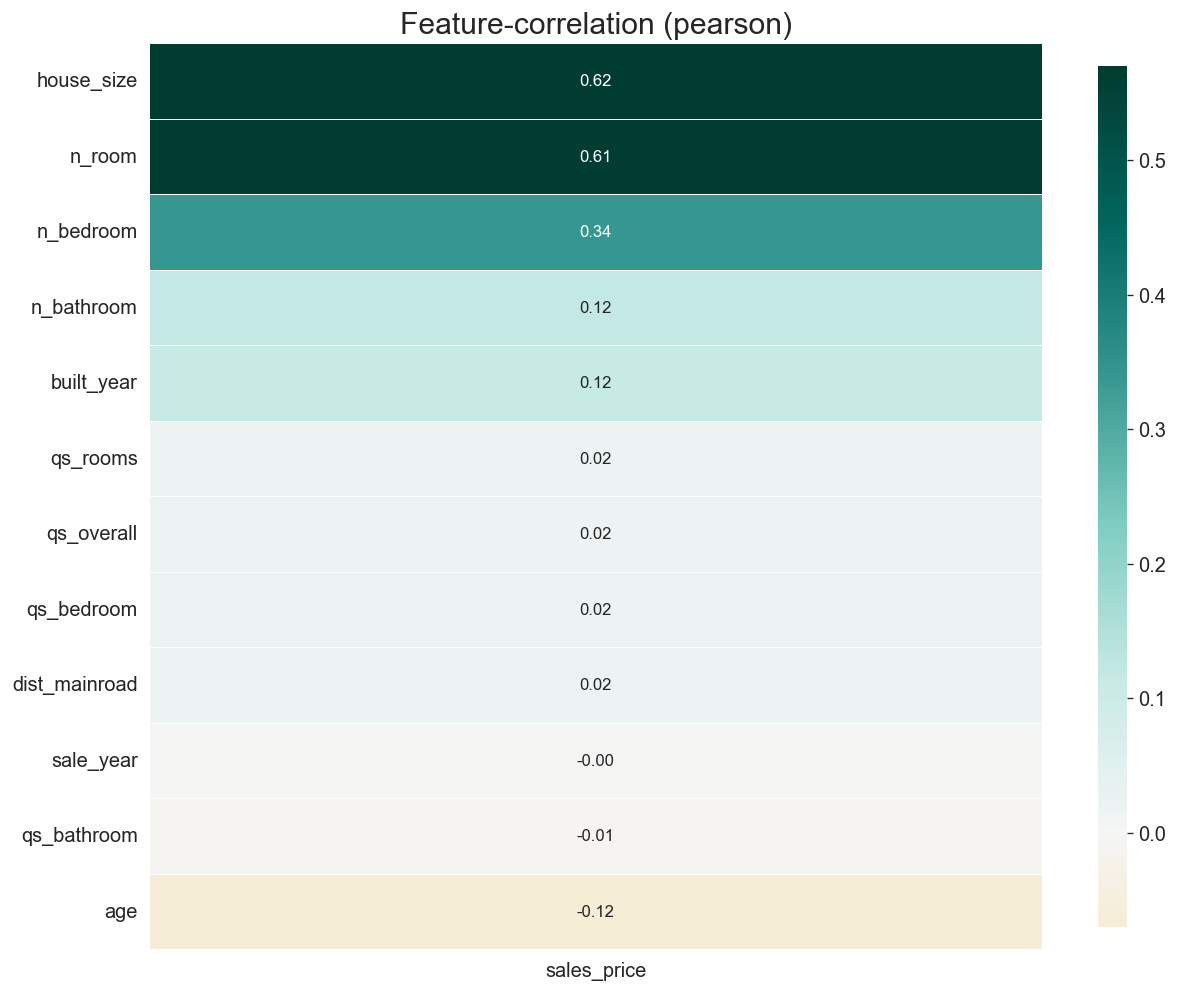

In [54]:
# Feature correlation 
klib.corr_plot(data, target='sales_price');

- House size and number of rooms are highly co-related to sales price.

<a id="built-year"></a>

### Built Year of Houses

In [55]:
house_built = data.built_year.value_counts()

In [56]:
# Highest and lowest number of houses were built in year

print("Highest number of houses were built in year {}, that is {} number of houses".format(house_built.idxmax(), house_built.max()))
print("Least number of houses were built in year {}, that is {} number of houses.".format(house_built.idxmin(), house_built.min()))

Highest number of houses were built in year 1985, that is 200 number of houses
Least number of houses were built in year 1949, that is 2 number of houses.


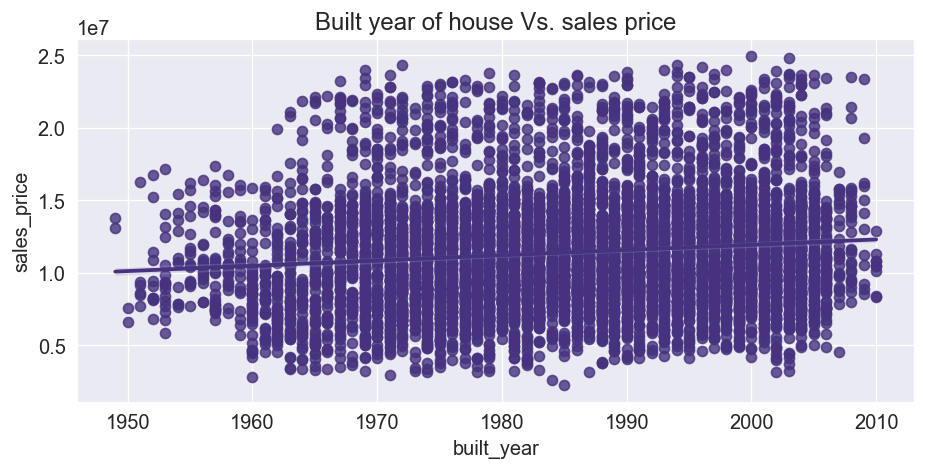

In [57]:
sns.set_palette('viridis')
ax = sns.regplot(data=data, x='built_year', y='sales_price')
plt.title("Built year of house Vs. sales price")
plt.show()

- The dataset has houses that were built in between 1950 to 2010.

- The more recent the house is built, the more is it's selling price.

- Built year follows a linear trend with sales price.

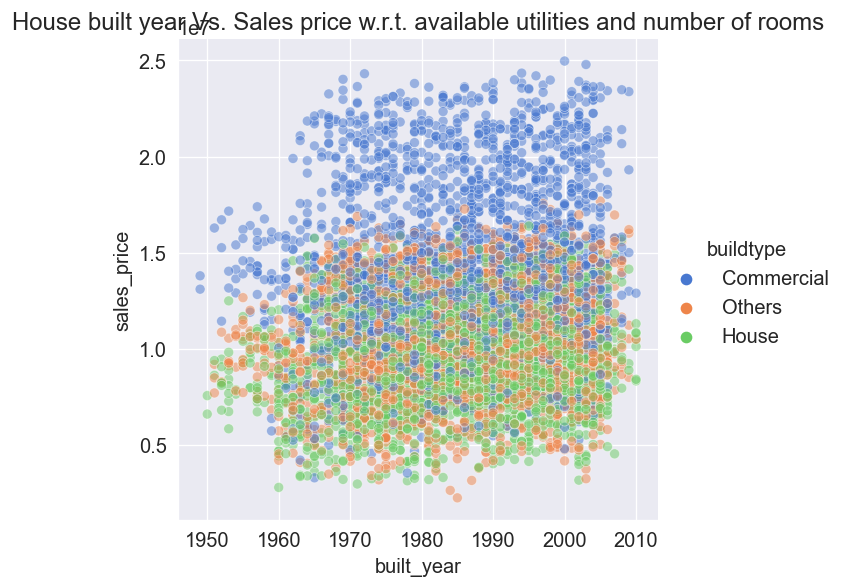

In [58]:
sns.relplot(
    data=data, 
    x='built_year', 
    y='sales_price', 
    hue='buildtype', 
    alpha=.5, 
    palette='muted'
)

plt.title("House built year Vs. Sales price w.r.t. available utilities and number of rooms")
plt.show()


<a id='sale-year'></a>

### Sale Year

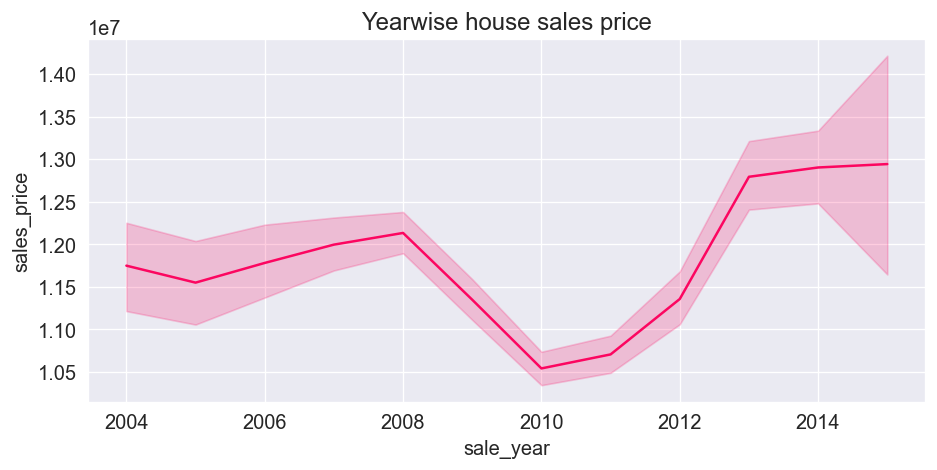

In [59]:
sns.lineplot(data=data, x='sale_year', y='sales_price', color='#FC0660')
plt.title("Yearwise house sales price")
plt.show()

- The dataset contains record of sales prices of house in Chennai reason from 2004 to 2015.

- There's a sharp decrease in house sales price from 2008 to 2010. There was `global financial crisis` in 2008. This instability in economic market lasted for 4 to 5 years. 

- There also small decrease in house price around 2005. 

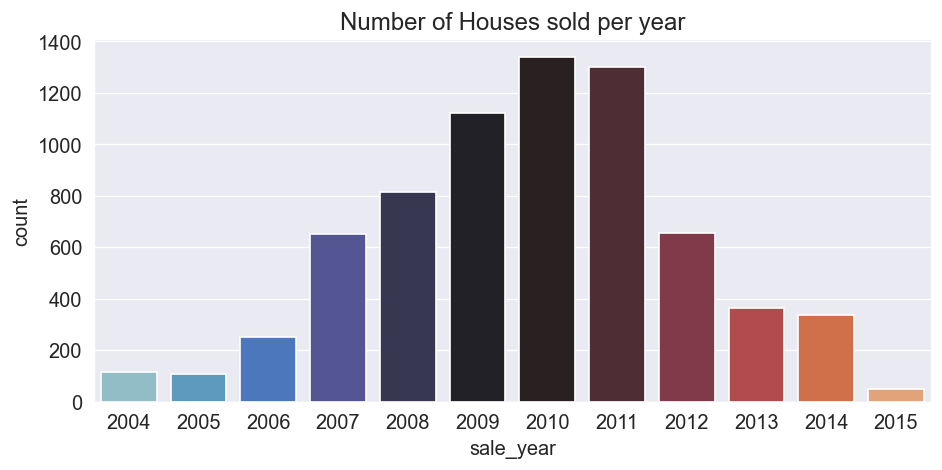

In [60]:
# Number of houses sold per year
sns.countplot(data=data, x='sale_year', palette='icefire')
plt.title("Number of Houses sold per year")
plt.show()

- In 2010, highest number of houses were sold followed by 2011 and 2009.

- Least number of houses are sold in 2004, 2005, and 2015.

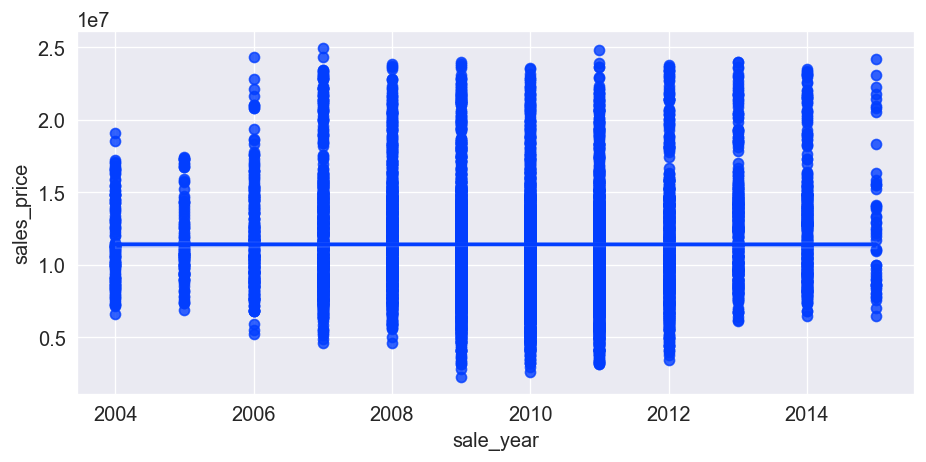

In [150]:
sns.regplot(data=data, x='sale_year', y='sales_price');

- Sale year does not show any relation with sales price.

- The relation is moreover uniform.

- We should drop sales year in preprocessing phase.

<a id='locality'></a>

### Locality

In [61]:
# unique values in area 

data.locality.nunique()

7

In [62]:
# value counts
area_df = house_data.locality.value_counts().reset_index(name='count')#.rename_axis('total')
area_df = area_df.rename_column('index', 'area')
area_df['percentage'] = round(area_df['count'] / data.shape[0] * 100, 2)
area_df

area  count  percentage
0    Chrompet   1702       23.94
1  Karapakkam   1366       19.22
2    KK Nagar    997       14.02
3   Velachery    981       13.80
4  Anna Nagar    788       11.08
5       Adyar    774       10.89
6     T Nagar    501        7.05

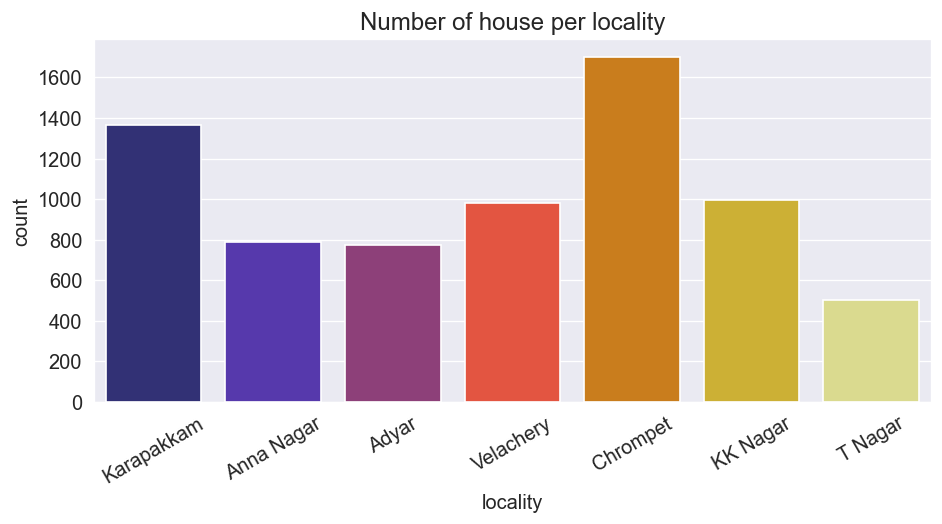

In [63]:
sns.countplot(x='locality', data=data, palette='CMRmap')
plt.title("Number of house per locality")
plt.xticks(rotation=30)
plt.show()

- Chrompet has highest number of houses followed by Karapakkam,

- T Nagar has least number of houses.

In [64]:
order = data[['locality','sales_price']].groupby('locality').mean().sort_values('sales_price').reset_index()
order

locality   sales_price
0  Karapakkam  7.755477e+06
1       Adyar  9.580581e+06
2    Chrompet  1.040800e+07
3   Velachery  1.158841e+07
4    KK Nagar  1.341933e+07
5  Anna Nagar  1.584423e+07
6     T Nagar  1.632265e+07

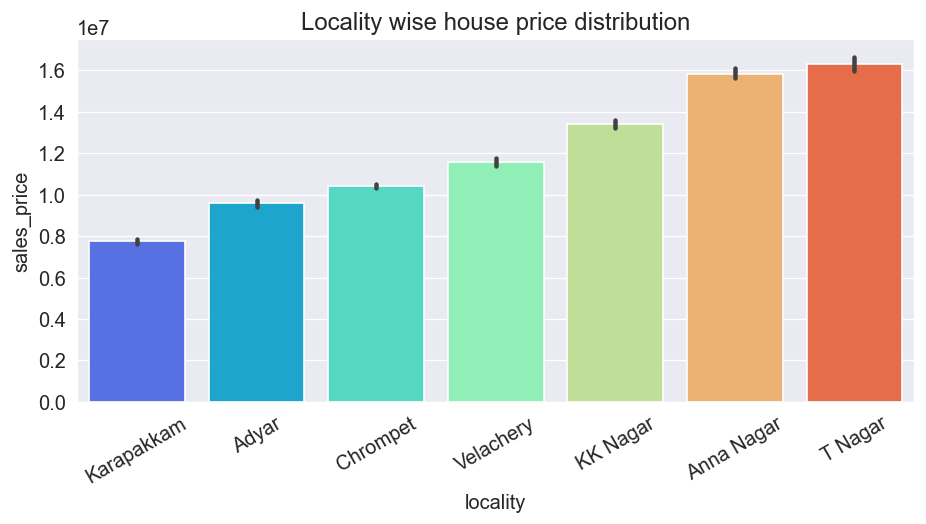

In [65]:
plt.figure(figsize=(9,4))
sns.barplot(
    data = data,
    x='locality', 
    y='sales_price',
    palette='rainbow', 
    order= order.locality
)
plt.xticks(rotation=30)
plt.title("Locality wise house price distribution")
plt.show()

- Locality wise house price follows a linear relationship. 

- Karapakkam has cheapest houses and T Nagar has expensive houses.

- For encoding locality attribute, label encoding is a better option.

#### Other observations from locality column:

- Homes in `Anna Nagar` are selling in highest price followed by `T Nagar`, followed by `KK Nagar`.

- Though more number of houses are getting sold at `Chrompet`and `Karapakkam`; `Karapakkam` has cheapest houses followed by `Adyar` and `Chrompet`.

- This is may be due to low price of houses, most number of houses are getting sold in these areas in comparison to other areas.

- Though number of house sold in `Anna Nagar` and `Adyar` are comparatively same, houses in `Adyar` are very cheaper in comparison to house price in `Anna Nagar`.

- We have to figure out possible reasons that make `Karapakkam` cheapest where as `T Nagar` and `Anna Nagar` are expensive areas to buy a house.

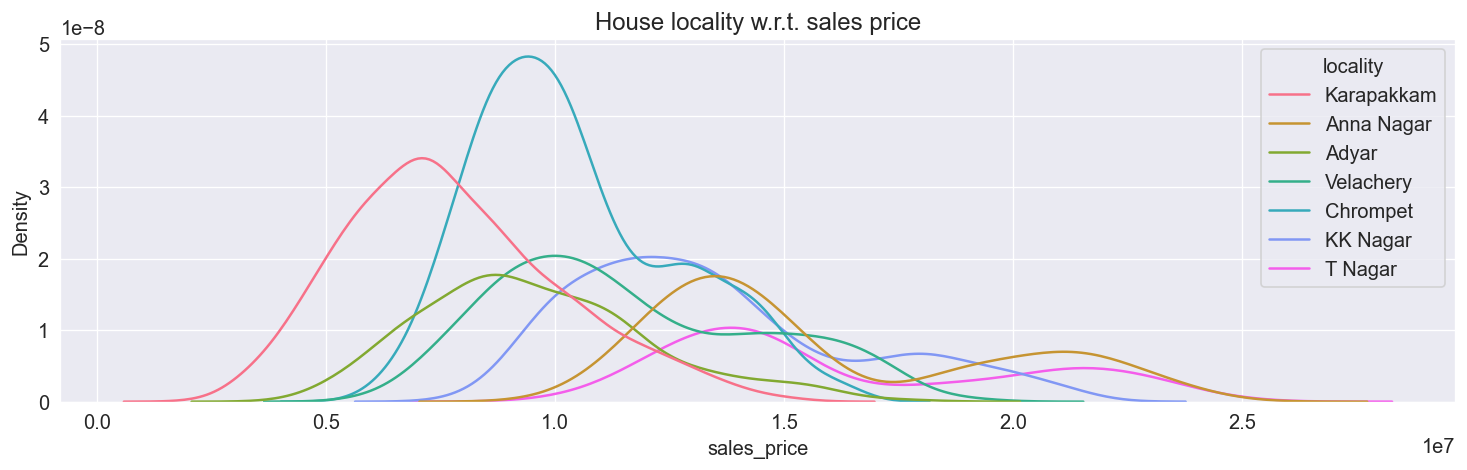

In [66]:
plt.figure(figsize=(15,4))
sns.kdeplot('sales_price',data=data, hue='locality')
plt.title("House locality w.r.t. sales price")
plt.show()

- It seems that the building type and available utilities effects the house price.

- Buildings with commercial build type and with all public facilities are very expensive.

- In `Karapakkam` the streets have limited or no access, which causes the house price to drop.

- Houses near to `Gravel` type of street come with highest price, followed by `paved` roads.

- Streets with no access gets less value.

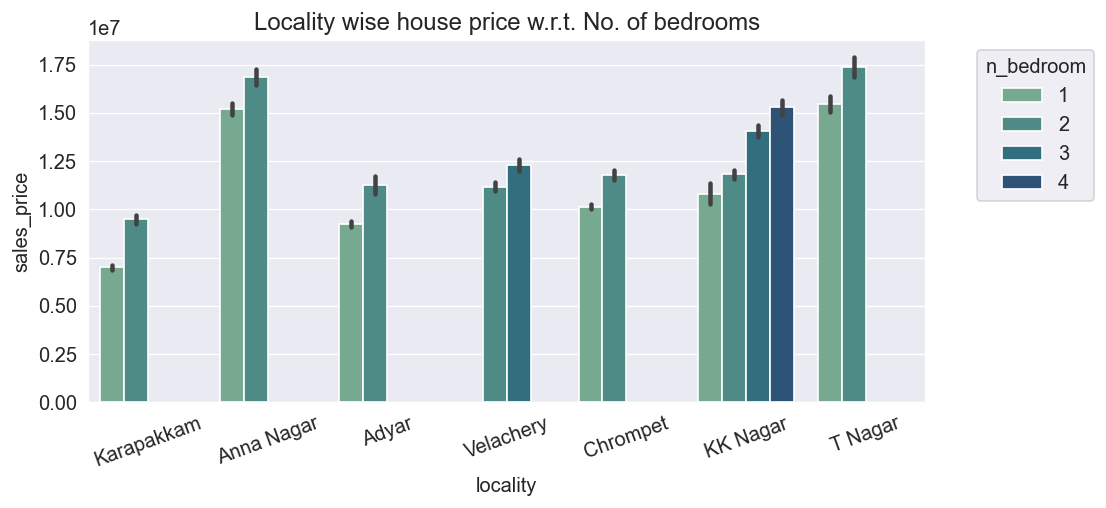

In [67]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality',y='sales_price', data=data, hue='n_bedroom', palette='crest')
plt.title("Locality wise house price w.r.t. No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='n_bedroom',bbox_to_anchor=(1.05,1))
plt.show()

- Most of areas have single bedroom houses.

- Karapakkam is the only area to have houses with 4 bedrooms.

- Valachery has no single bedroom house.

- Anna Nagar and T Nagar has highest price houses.

- KK Nagar has 4 bedroom houses but their price is comparatively lower to 2 bedroom houses in Anna Nagar and T-Nagar.


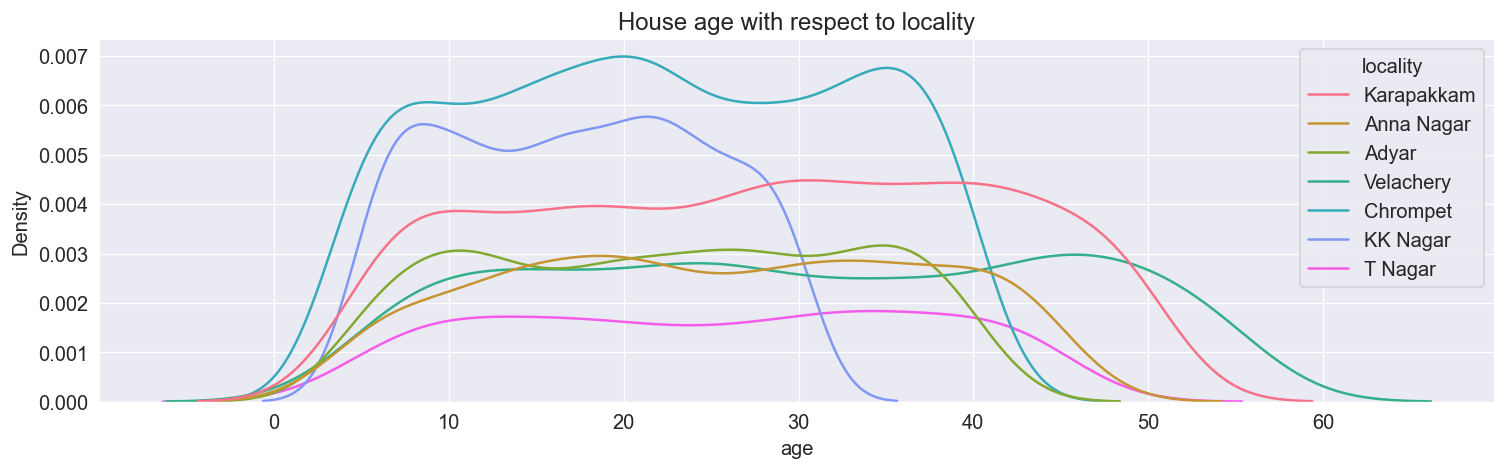

In [68]:
plt.figure(figsize=(15,4))
sns.kdeplot('age', hue='locality', data=data)
plt.title("House age with respect to locality")
plt.show()

- Velachery has more old houses.

- KK Nagar has more young houses.

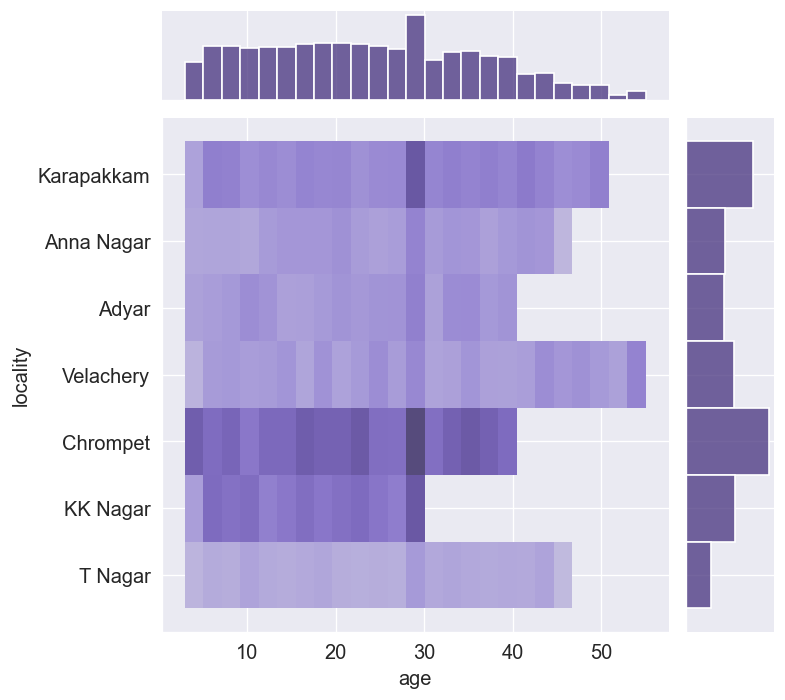

In [69]:
sns.jointplot(x='age', y='locality', data=data, kind='hist');

- KK Nagar has houses under 30 years old, Velachery has more older houses more than 50 years old.

- The dataset has less number of houses with age more than 40. More number of houses are of 30 years old.

<a id='house-size'></a>

## House size

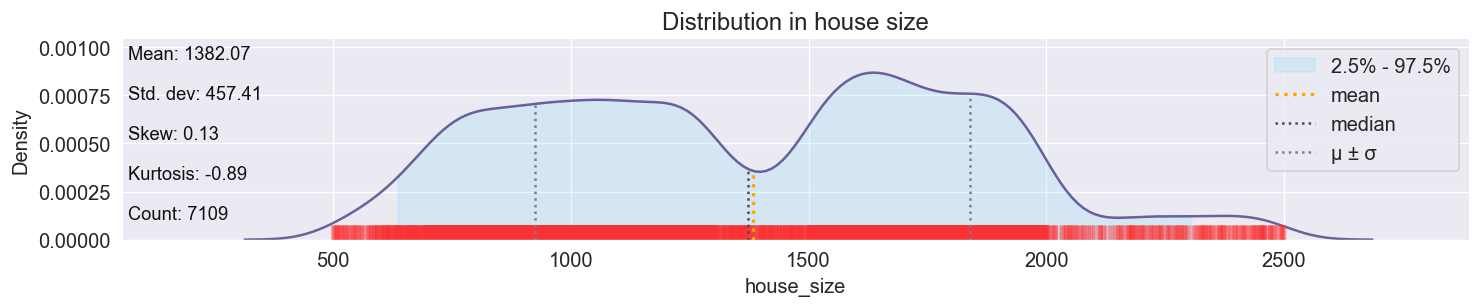

In [70]:
klib.dist_plot(data['house_size'])
plt.title("Distribution in house size")
plt.show()

- Average house size is 1382 sq ft. 

- House size is not normally distributed.

- We will scale house size in preprocessing phase.

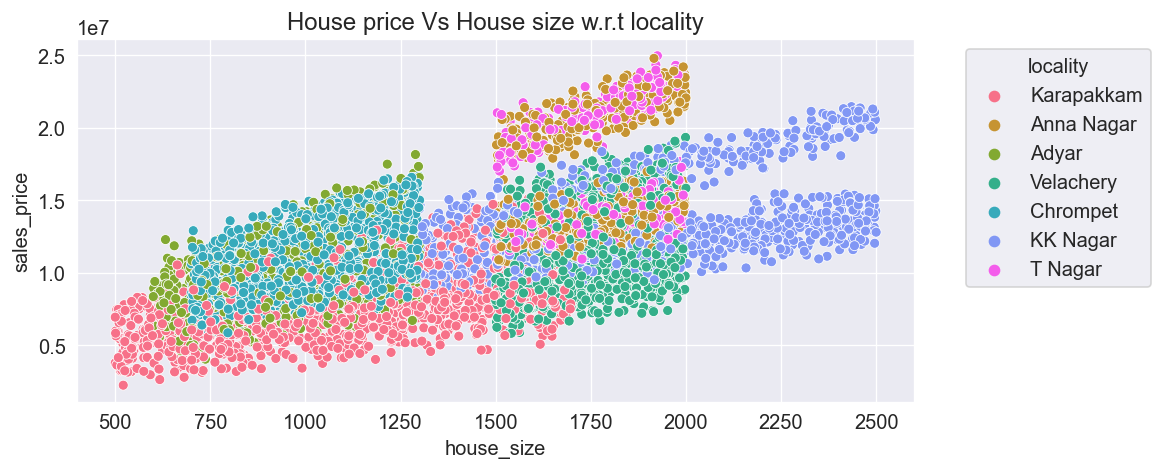

In [71]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=data, x='house_size', y='sales_price', hue='locality')
plt.title("House price Vs House size w.r.t locality")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()

- House size follows linear relationship with house price in individual level as well as in cumulative level.

- KK Nagar houses are comparatively bigger in size than houses in other areas.

- Karapakkam, Adyar has lower size houses.

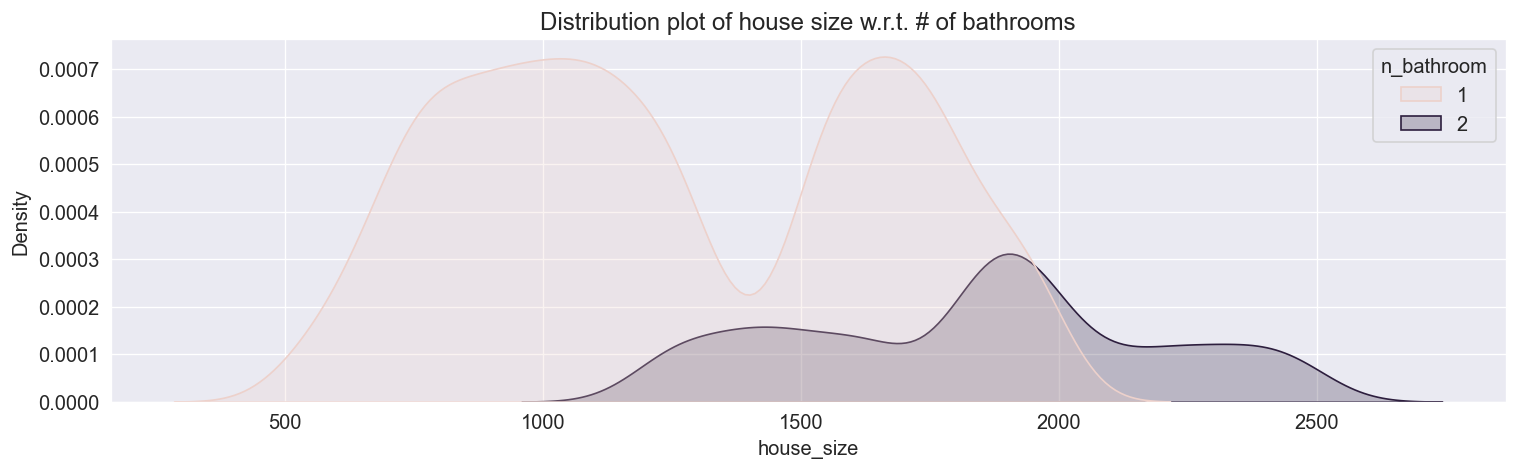

In [72]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_bathroom', data=data, shade=True)
plt.title("Distribution plot of house size w.r.t. # of bathrooms")
plt.show()

- Houses with single bathroom belongs to an size of 500 to 2000 sq ft.

- Whereas, the houses with dual bathroom are bigger in size ranging from 1000 sq ft to 2500+ sq ft.

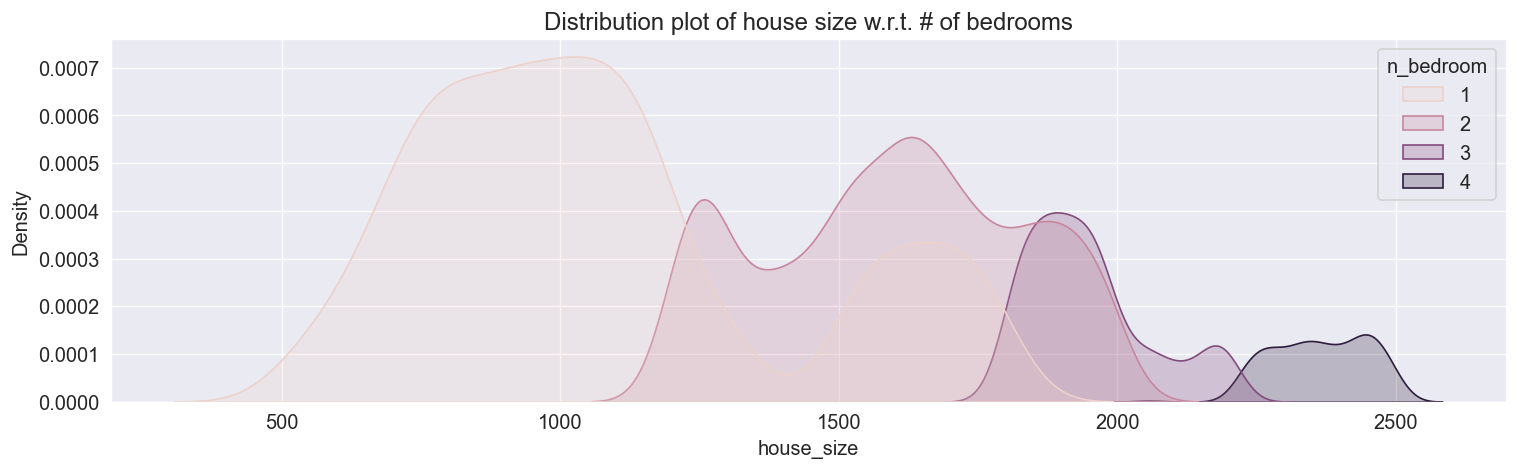

In [73]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_bedroom', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of bedrooms")
plt.show()

- Houses with single bedroom are of size 500 sq ft to 2000 sq ft. where as most houses lie in 500 - 1500 sq ft range.
- Houses with double bedroom ranges from 1100 sq ft to 2300 sq ft range, whereas, triple bedroom houses are of only 1700 sq ft to 2100 sq ft.

- Houses with 4 bedrooms are of size 2100 sqft to 2500 sq ft.


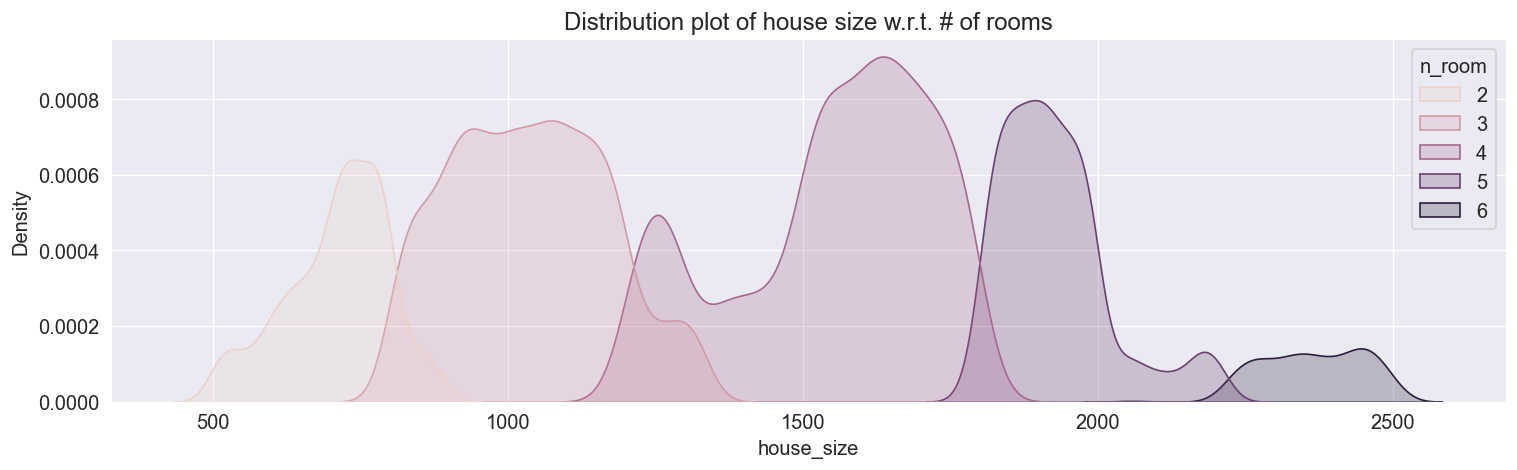

In [74]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_room', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of rooms")
plt.show()

From the above plot we can see that,
- Very few houses has 6 rooms and 2 rooms.
- Most houses are having 4 rooms followed by 3 rooms.


<a id='distance-to-main-road'><a>

### Distance from Main Road (dist_mainroad)

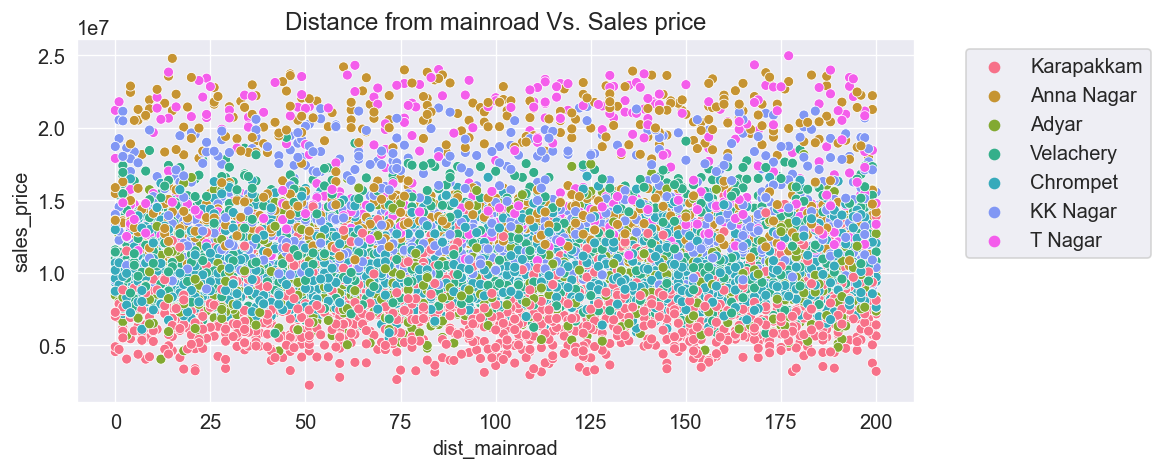

In [75]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='dist_mainroad',y='sales_price', data=data, hue='locality')
plt.title("Distance from mainroad Vs. Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

- Distance form main road in all locality has `uniform distribution`.

- We can drop this feature for machine learning.

- Distance of home from main roads does not affect the sales price much.

<a id="rooms"><a>

### Number of Rooms

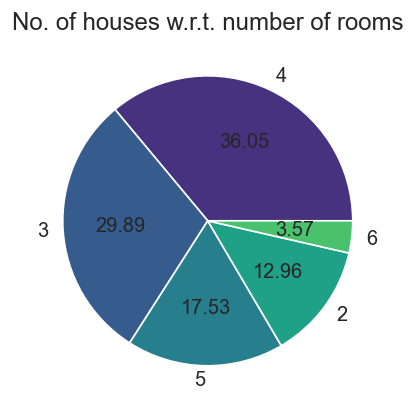

In [76]:
data.n_room.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of rooms")
plt.ylabel('')
plt.show()

- The above pie plot evident that people are interested in house with 4 number of rooms followed by 3 rooms.


In [77]:
order = data[['n_room','sales_price']].groupby('n_room').mean().sort_values('sales_price').reset_index()
order

n_room   sales_price
0       2  7.311581e+06
1       3  9.705458e+06
2       4  1.225463e+07
3       5  1.483657e+07
4       6  1.527924e+07

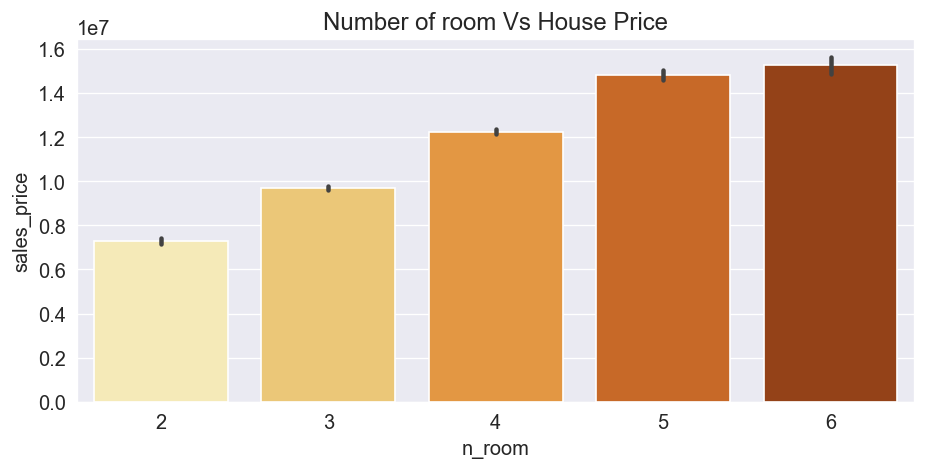

In [78]:
plt.figure(figsize=(9,4))
sns.barplot(data=data, x='n_room',y='sales_price', order=order.n_room, palette='YlOrBr')
plt.title("Number of room Vs House Price")
plt.show()

- With increase in room number, house price increase. Follows a linear trend.

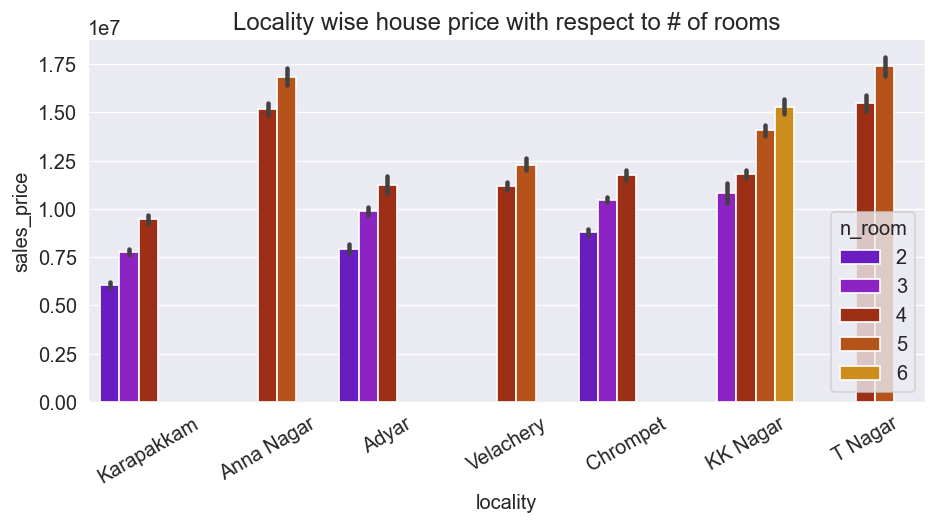

In [79]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality',y='sales_price', data=data, hue='n_room', palette='gnuplot')
plt.title("Locality wise house price with respect to # of rooms")
plt.xticks(rotation=30)
plt.show()


- `Anna Nagar`, `Velachery`, `KK Nagar`, and `T Nagar` has houses more with more than 4 rooms.

- `KK Nagar` is the only place to have houses with 6 rooms.

- `Chrompet` has highest number of houses sold with 3 rooms.


<a id='bedrooms'></a>

### Number of Bedrooms

- Its a categorical value column.

In [80]:
data.n_bedroom.value_counts()

1    3796
2    2352
3     707
4     254
Name: n_bedroom, dtype: int64

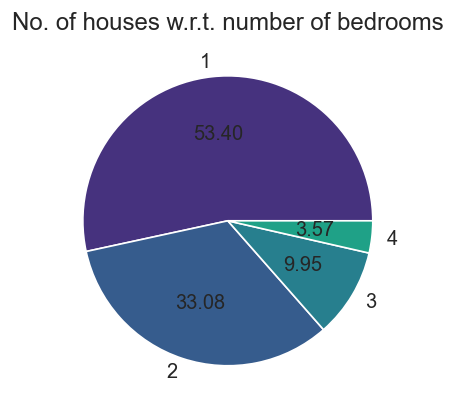

In [81]:

data.n_bedroom.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bedrooms")
plt.ylabel('')
plt.show()

- 3796 (53.4%) houses in the dataset has single bedroom. Whereas, only 254 (3.57%) houses has 4 bedrooms.

In [82]:
order = data[['n_bedroom','sales_price']].groupby('n_bedroom').mean().sort_values('sales_price').reset_index()
# order['n_bedroom'] = order.n_bedroom.astype('str')

order

n_bedroom   sales_price
0          1  1.022734e+07
1          2  1.239016e+07
2          3  1.313775e+07
3          4  1.527924e+07

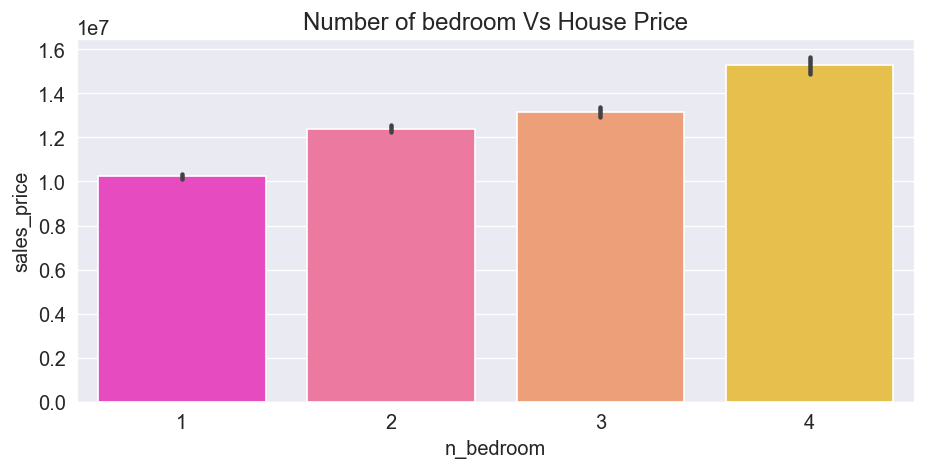

In [83]:
plt.figure(figsize=(9,4))
sns.barplot(data=data, x='n_bedroom',y='sales_price', order=order.n_bedroom, palette='spring')
plt.title("Number of bedroom Vs House Price")
plt.show()

- Number of bedrooms and house price follows a linear trend.

In [84]:
# Count of houses with respect to number of bedroom 
data.groupby(['n_room', 'n_bedroom'])['n_bedroom'].count()

n_room  n_bedroom
2       1             921
3       1            2125
4       1             750
        2            1813
5       2             539
        3             707
6       4             254
Name: n_bedroom, dtype: int64

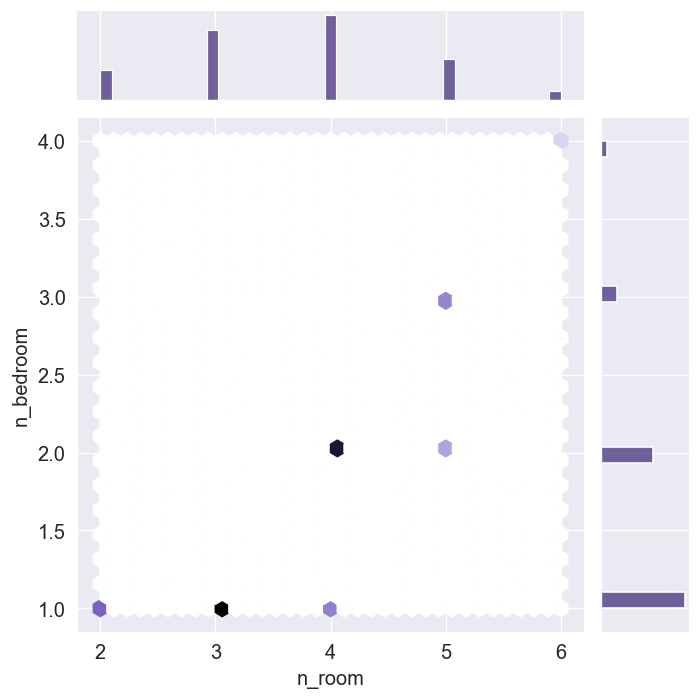

In [85]:
sns.jointplot(x='n_room',y='n_bedroom', data=data, kind='hex')
plt.show()

- In the dataset, most houses has 3 or 4 rooms, in case a house with 3 rooms, only bedroom is present, where as in case of 4 room houses, 2 bedrooms are present.

- Houses with 5 rooms has 2 and 3 bedrooms and houses with 6 rooms has 4 bedrooms.

In [86]:
locality_wise_bedroom= data.groupby(['locality', 'n_room', 'n_bedroom'])['n_bedroom'].count().to_frame(name='count')
locality_wise_bedroom

count
locality   n_room n_bedroom       
Adyar      2      1            213
           3      1            429
           4      2            132
Anna Nagar 4      1            474
           5      2            314
Chrompet   2      1            276
           3      1           1145
           4      2            281
KK Nagar   3      1             39
           4      2            364
           5      3            340
           6      4            254
Karapakkam 2      1            432
           3      1            512
           4      2            422
T Nagar    4      1            276
           5      2            225
Velachery  4      2            614
           5      3            367

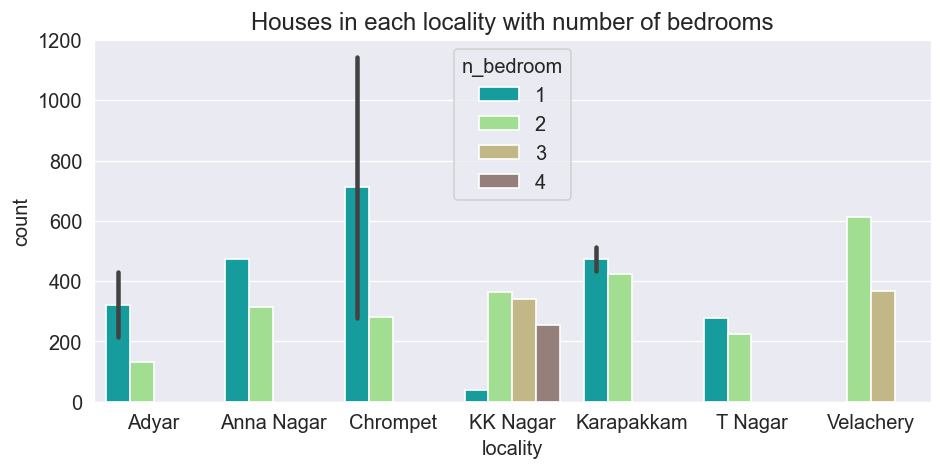

In [87]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bedroom.reset_index(), x='locality', y='count', hue='n_bedroom', palette='terrain')
plt.title("Houses in each locality with number of bedrooms")
plt.show()

- Chrompet has highest number of houses with 3 rooms, but most of them are single bedroom. May be due to houses with single bedroom, Chrompet has cheapest houses.

- KK Nagar has less number of houses with single bedroom.

- Velachery has no single bedroom houses.

<a id='bathrooms'></a>

### Number of Bathrooms


- It is also a categorical column

In [88]:
data.n_bathroom.value_counts()

1    5594
2    1515
Name: n_bathroom, dtype: int64

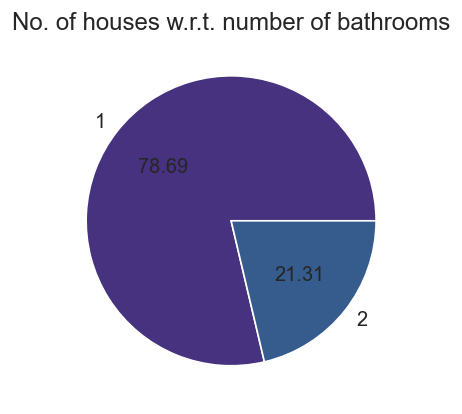

In [89]:
data.n_bathroom.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bathrooms")
plt.ylabel('')
plt.show()

- More houses have single bathroom. 

In [90]:
locality_wise_bathroom= data.groupby(['locality', 'n_room', 'n_bathroom'])['n_bathroom'].count().to_frame(name='count')
locality_wise_bathroom

count
locality   n_room n_bathroom       
Adyar      2      1             213
           3      1             429
           4      2             132
Anna Nagar 4      1             474
           5      1             314
Chrompet   2      1             276
           3      1            1145
           4      1             281
KK Nagar   3      1              39
           4      1             364
           5      2             340
           6      2             254
Karapakkam 2      1             432
           3      1             512
           4      2             422
T Nagar    4      1             276
           5      1             225
Velachery  4      1             614
           5      2             367

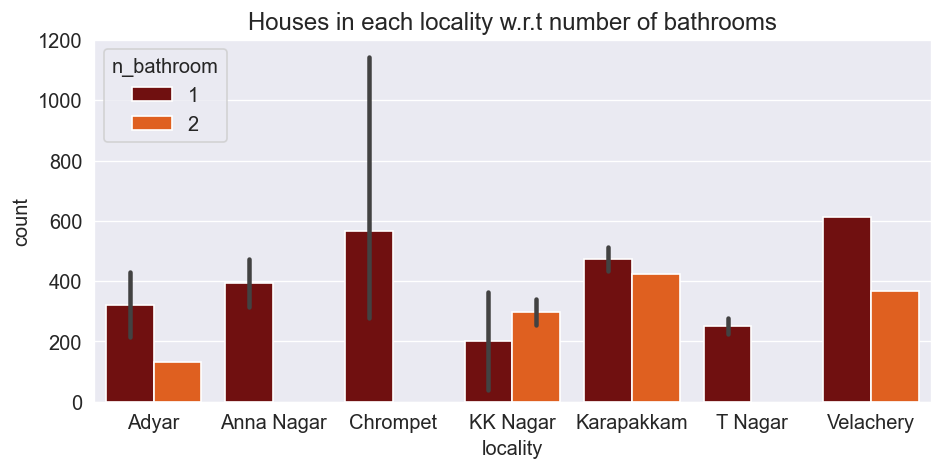

In [91]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bathroom.reset_index(), x='locality', y='count', hue='n_bathroom', palette='gist_heat')
plt.title("Houses in each locality w.r.t number of bathrooms")
plt.show()

- Anna Nagar, Chrompet and T Nagar has no houses with double bathrooms.

- KK Nagar has more number of houses with double bathrooms.

In [92]:
data.groupby(['n_room', 'n_bathroom'])['n_bathroom'].count()

n_room  n_bathroom
2       1              921
3       1             2125
4       1             2009
        2              554
5       1              539
        2              707
6       2              254
Name: n_bathroom, dtype: int64

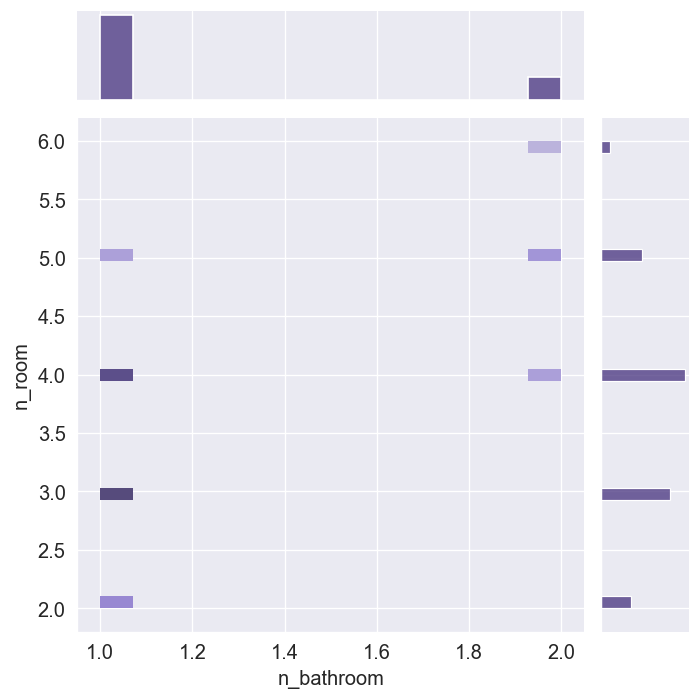

In [93]:
sns.jointplot(x='n_bathroom',y='n_room', data=data, kind='hist')
plt.show()

- The above plot show that houses with 4 rooms and above has double bathrooms.

<a id='sale-condition'></a>

### Sale Condition

In [94]:
data.sale_cond.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

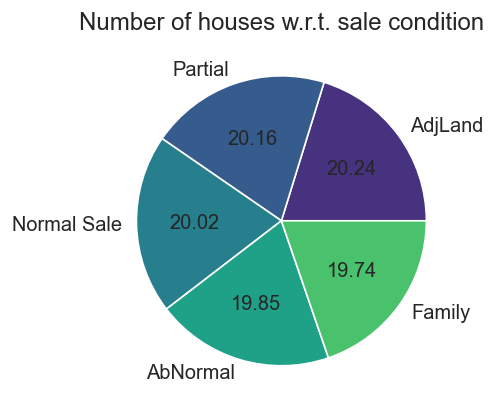

In [95]:
data.sale_cond.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.ylabel('')
plt.title("Number of houses w.r.t. sale condition")
plt.show()

- The different types of sale conditions are not much significant, however, sale condition as AdjLand has highest number of houses, and family type sales are less.

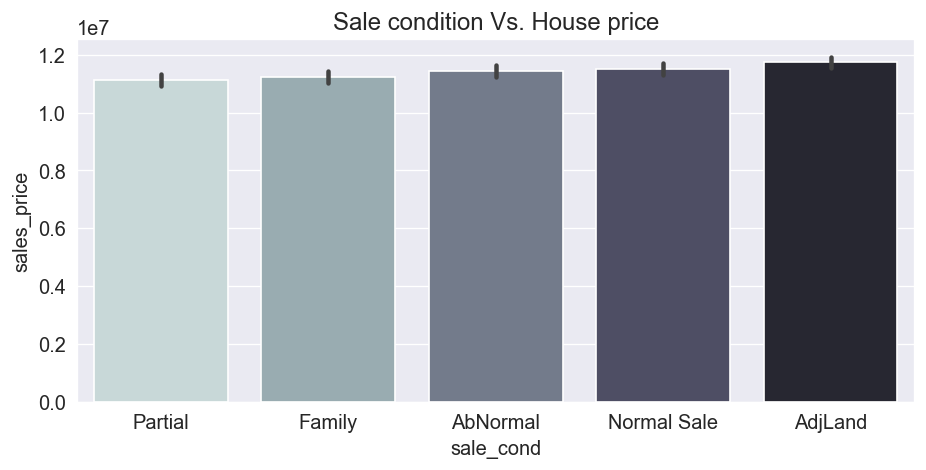

In [96]:
plt.figure(figsize=(9,4))
sns.barplot(
    data = data, 
    x='sale_cond', 
    y='sales_price',
    order=data[['sale_cond','sales_price']].groupby('sale_cond').mean().sort_values('sales_price').reset_index().sale_cond,
    palette='bone_r'
)
plt.title("Sale condition Vs. House price")
plt.show()

- Sale condition of house with respect to house price follows a linear trend.

- Adjacent lands are of highest price, where as partially sold houses has less price.

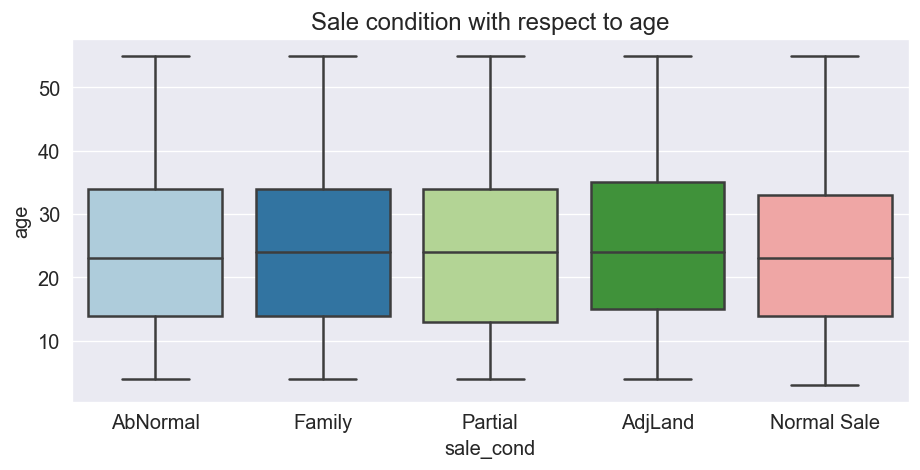

In [97]:
# Is there any relation between sale condition and age
plt.figure(figsize=(9,4))
sns.boxplot(x='sale_cond', y='age', data=data, palette='Paired')
plt.title("Sale condition with respect to age")
plt.show()

- Sale condition with respect to house age is not much different from each other. 

In [98]:
order = data[['sale_cond','house_size']].groupby('sale_cond').mean().sort_values('house_size')
order

house_size
sale_cond               
Family       1373.263008
AdjLand      1378.141765
AbNormal     1380.321758
Partial      1382.757851
Normal Sale  1395.781448

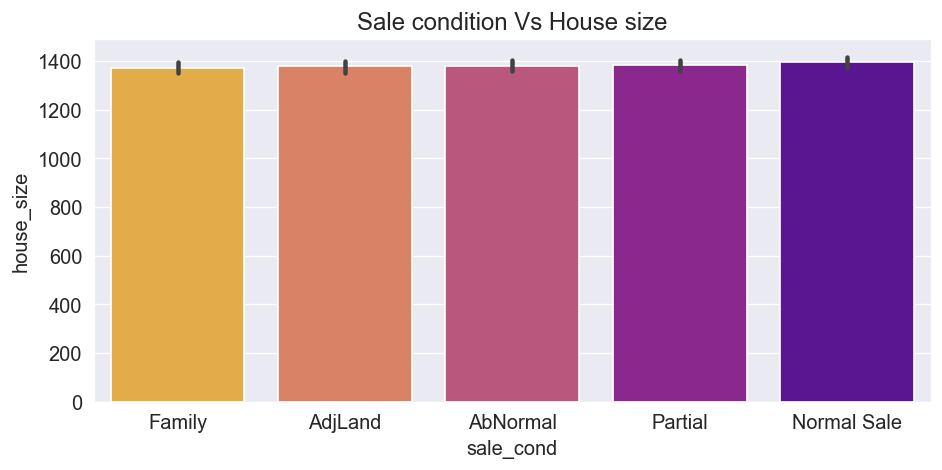

In [99]:
plt.figure(figsize=(9,4))
sns.barplot(
    x='sale_cond', 
    y='house_size', 
    data=data, 
    order=order.reset_index().sale_cond,
    palette='plasma_r')
plt.title("Sale condition Vs House size")
plt.show()

- Sale condition with respect to house size follows a `linear trend`. 

- Where Normal sale type has higher distribution and family type has lower.

- To encode sale condition attribute, label encoding will be a better choice. 

<a id='parking-facility'></a>

### Parking Facility

In [100]:
data.park_facil.value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

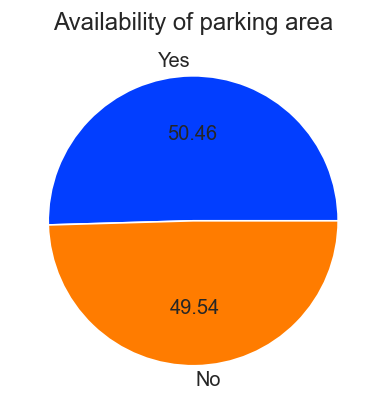

In [151]:
sns.set_palette('bright')
data.park_facil.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of parking area")
plt.ylabel('')
plt.show()

- Only 0.92% more houses has parking facility.

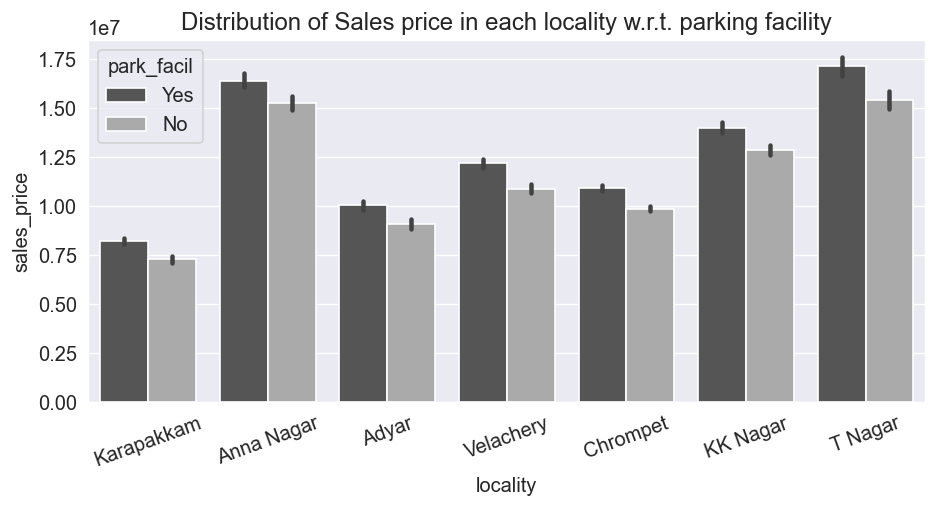

In [102]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality', y='sales_price', data=data, hue='park_facil', palette='binary_r')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality w.r.t. parking facility")
plt.show()

- All the areas have houses with parking facility.

- In fact, parking facility houses are more in number in comparison to houses with no parking facility.

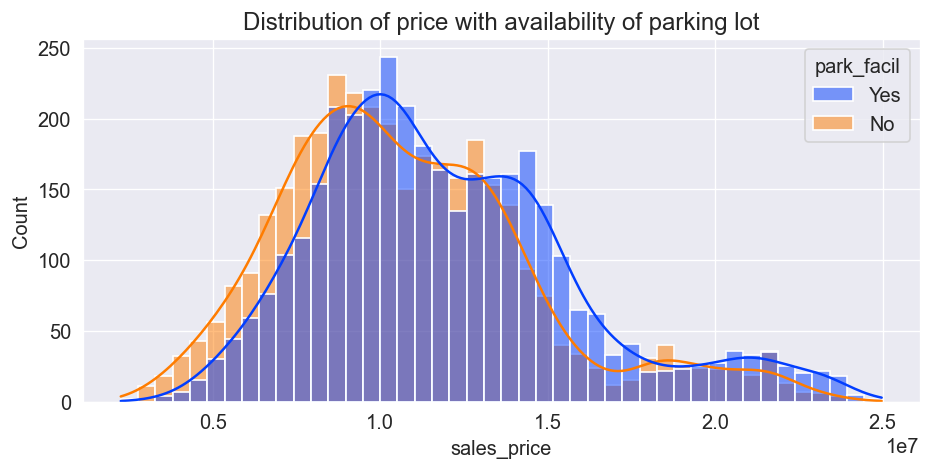

In [103]:
sns.set_palette('bright')
sns.histplot(data=data, x='sales_price', hue='park_facil',kde=True)
plt.title("Distribution of price with availability of parking lot")
plt.show()

- Overall houses with no parking facility are cheapest while houses with parking area are expensive.

- Some houses has (a few only) has no parking facility but are expensive.

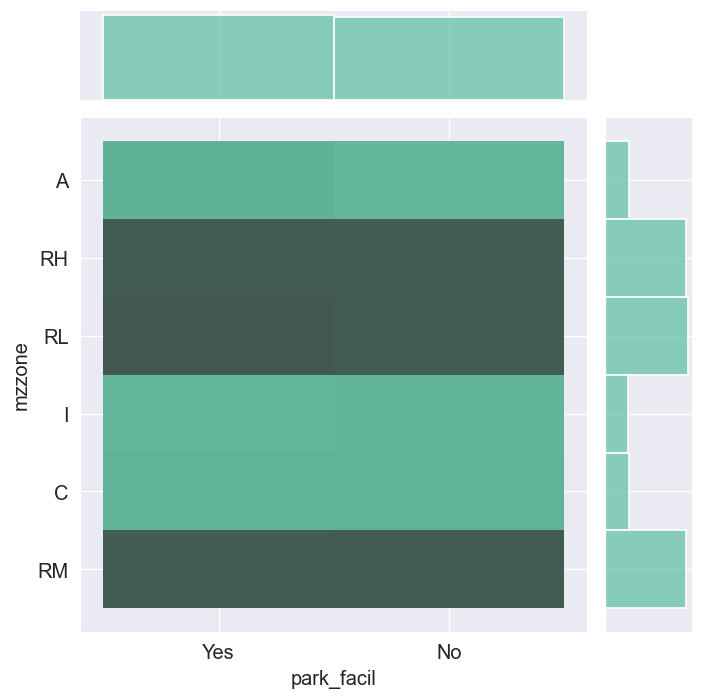

In [104]:
sns.set_palette('Set2')
sns.jointplot(x='park_facil',y='mzzone', data=data, kind='hist');

- Municipal zone RL has more houses with parking facility. 

- Whereas A zone has less houses with parking facility.

<a id='built-type'></a>

### Built Type

In [105]:
data.buildtype.value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

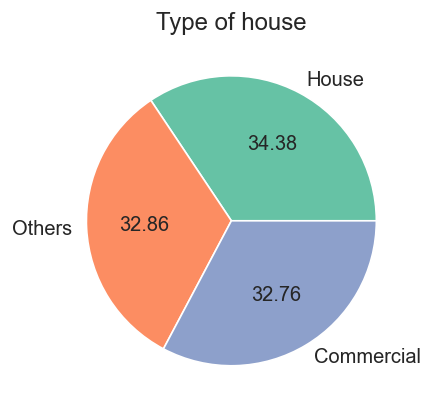

In [106]:
plt.figure(figsize=(9,4))
data.buildtype.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Type of house")
plt.ylabel('')
plt.show()

- More number of houses are of house type building where as less number of houses are commercial build.

In [107]:
data[['buildtype','sales_price']].groupby('buildtype').mean().sort_values('sales_price')

sales_price
buildtype               
House       9.531205e+06
Others      1.027346e+07
Commercial  1.453023e+07

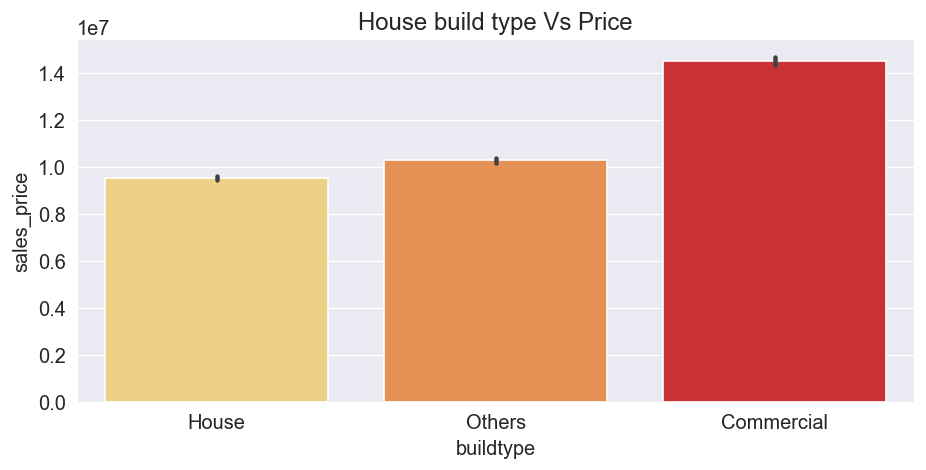

In [108]:
plt.figure(figsize=(9,4))
sns.barplot(x='buildtype', y='sales_price', data=data, order=data[['buildtype','sales_price']].groupby('buildtype').mean().sort_values('sales_price').reset_index().buildtype, palette='YlOrRd')
plt.title("House build type Vs Price")
plt.show()

- Commercial houses are expensive than house type buildings.

- Does not follow linear trend. (one-hot encoding)

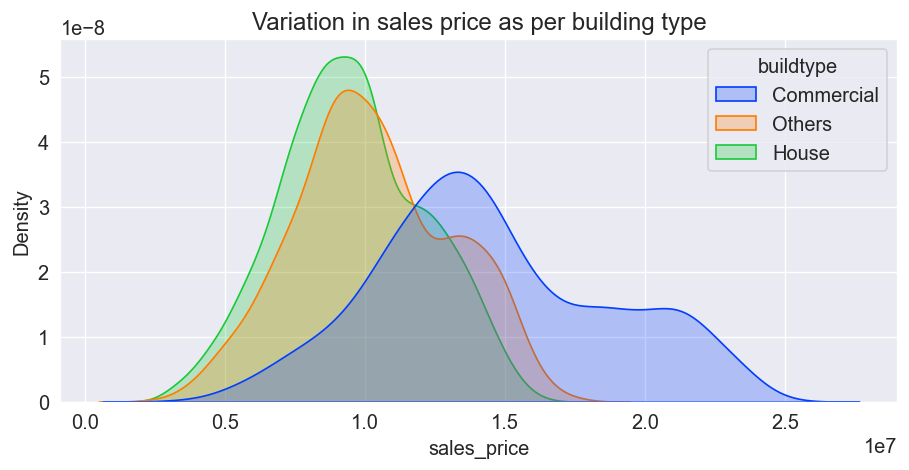

In [109]:
sns.set_palette('bright')
sns.kdeplot(data=data, x='sales_price', hue='buildtype', shade=True)
plt.title("Variation in sales price as per building type")
plt.show()

- Commercial build type houses are of high price.

- Too much houses are sold from other types and residential houses types than commercial types.

<a id='utility-avail'></a>

### Utility Available 

In [110]:
print("Number of utility {}\nE.g.:".format(data.utility_avail.nunique()))
print(*data.utility_avail.unique().tolist())

Number of utility 4
E.g.:
AllPub ELO NoSewr  NoSeWa


In [111]:
data.utility_avail.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: utility_avail, dtype: int64

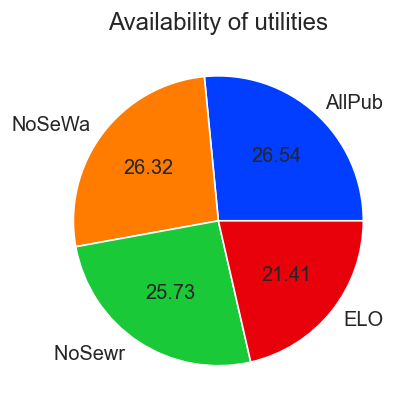

In [112]:
data.utility_avail.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of utilities")
plt.ylabel('')
plt.show()

- 26.54% houses has all public facilities available.

In [113]:
order = data[['utility_avail','sales_price']].groupby('utility_avail').mean().sort_values('sales_price')
order

sales_price
utility_avail              
ELO            1.094887e+07
NoSeWa         1.141877e+07
NoSewr         1.144859e+07
AllPub         1.174658e+07

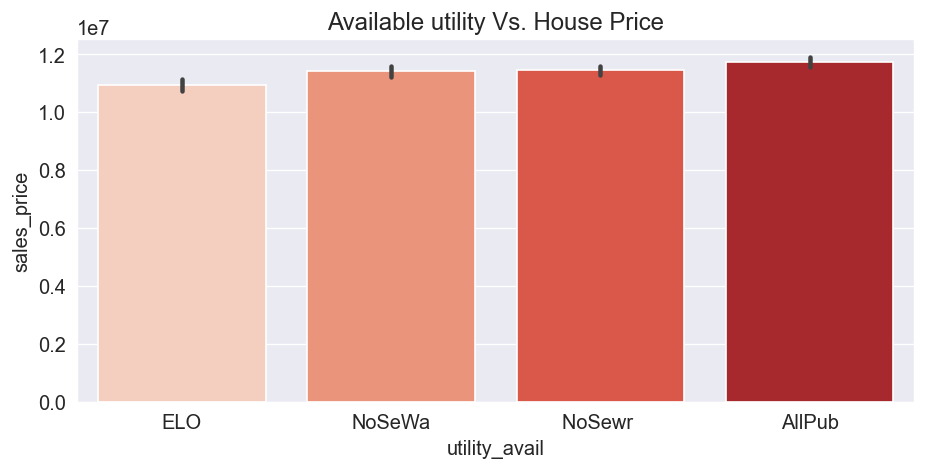

In [114]:
sns.barplot(x='utility_avail', y='sales_price', data=data, order=order.reset_index().utility_avail, palette='Reds')
plt.title("Available utility Vs. House Price")
plt.show()

- Utility available follows a linear trend with respect to sales price.

- Encoding for utility attribute will follow label encoding.

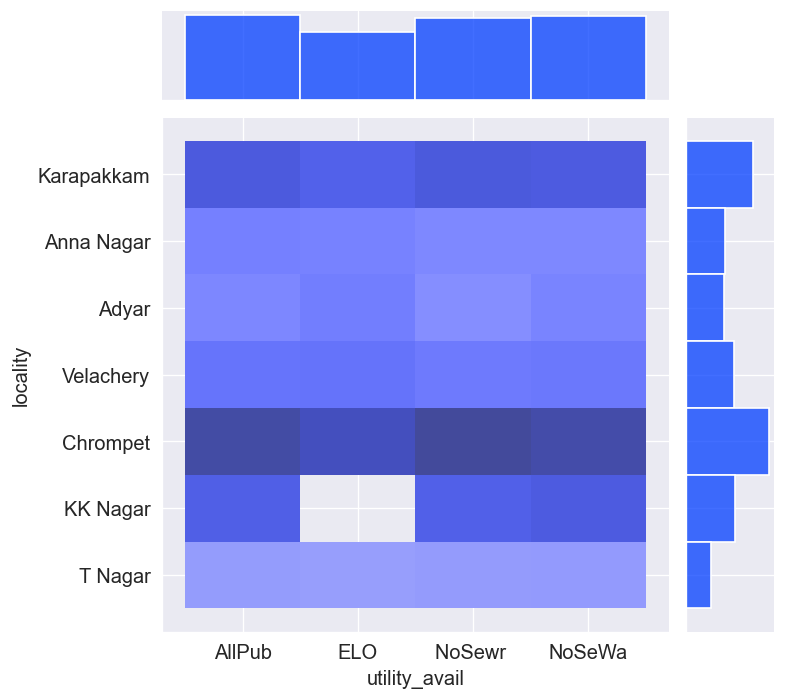

In [115]:
sns.jointplot(data=data, x='utility_avail',y='locality', kind='hist');

- KK Nagar has no ELO facility.
- Chrompet has highest number of houses with all facility available and respectively more houses with no sewage water available.

<a id='street'></a>

### Street

In [116]:
data.street.nunique()

3

In [117]:
data.street.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

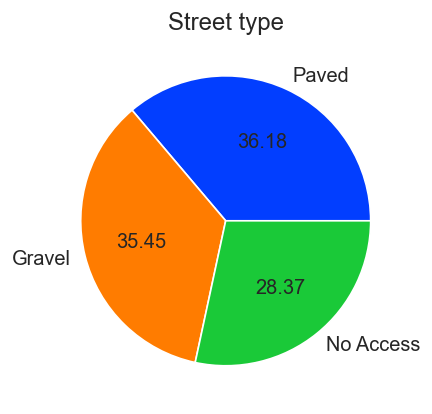

In [118]:
data.street.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Street type")
plt.ylabel('')
plt.show()

- More than 36% houses has paved street, and 28.37% houses are not connected to any major root.

In [119]:
order = data[['street','sales_price']].groupby('street').mean().sort_values('sales_price')
order

sales_price
street                 
No Access  1.045657e+07
Paved      1.159247e+07
Gravel     1.199494e+07

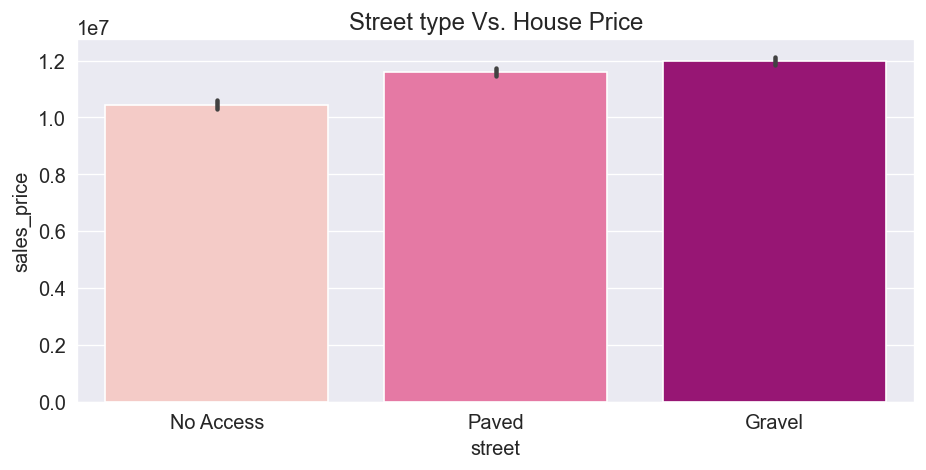

In [120]:
plt.figure(figsize=(9,4))
sns.barplot(x='street', y='sales_price', data=data, order=order.reset_index().street, palette='RdPu')
plt.title("Street type Vs. House Price")
plt.show()

- Street type follows a linear trend with house price.

- Gravel houses have highest price.

- Will go with one hot coding.

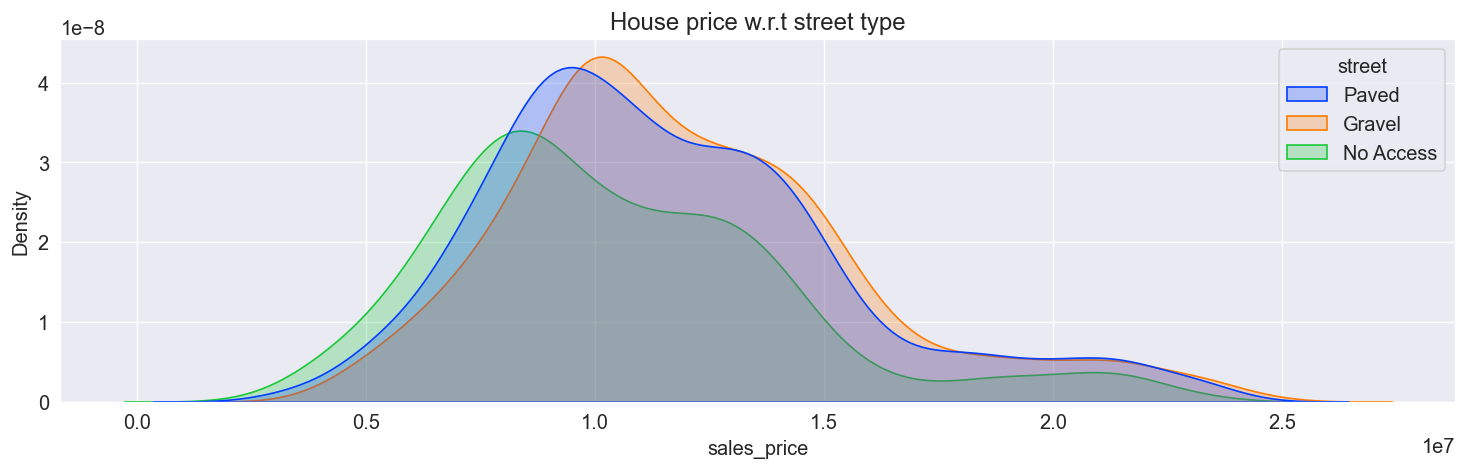

In [121]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=data, x='sales_price', hue='street', shade=True)
plt.title("House price w.r.t street type")
plt.show()

- Houses with no access are less expensive. 

- Most houses with gravel street type are expensive.

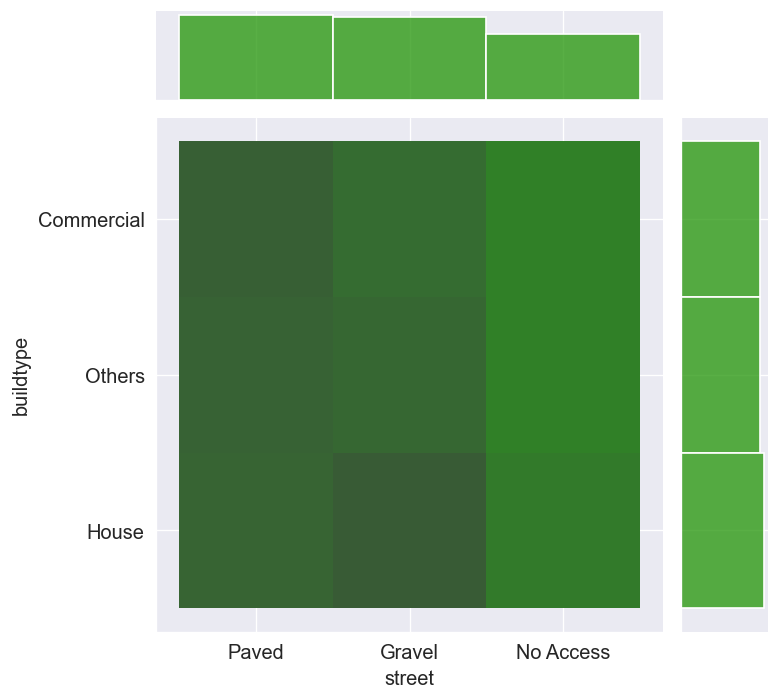

In [122]:
sns.jointplot(data=data, x='street', y='buildtype', kind='hist', color='#229506');

- Most commercial houses are of paved street, and most house type houses has gravel street.
- Among houses with no access, number of housing type houses are more.

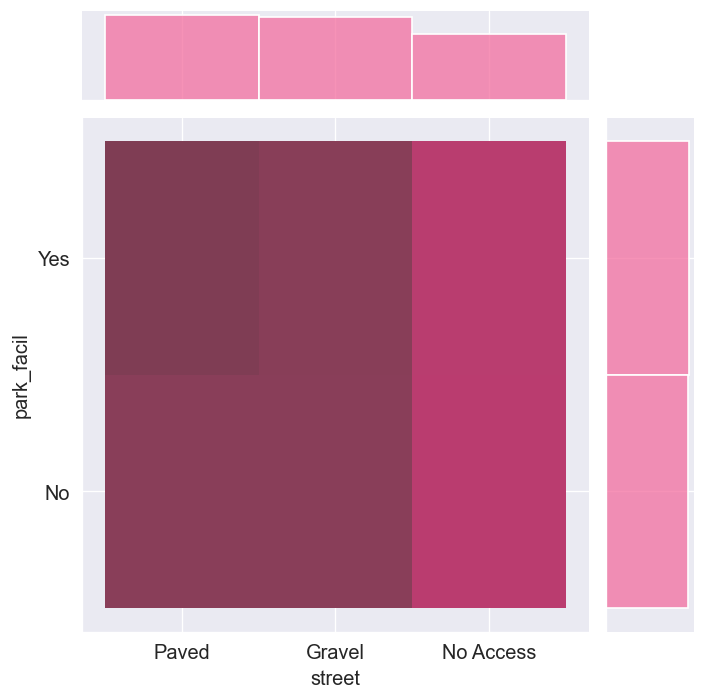

In [123]:
sns.jointplot(data=data, x='street', y='park_facil', kind='hist', color='#F36E9F');

- Paved street type houses has comparatively a few number of houses with parking facility.

<a id='municipality-zone'></a>

### Municipality zone

In [124]:
data.mzzone.nunique()

6

In [125]:
data.mzzone.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

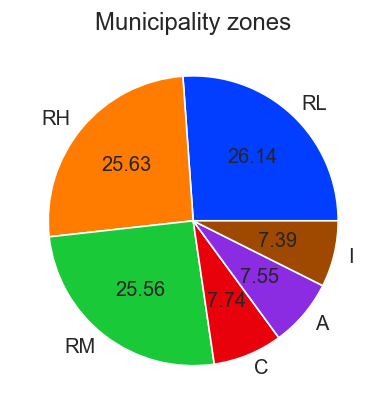

In [126]:
data.mzzone.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Municipality zones")
plt.ylabel('')
plt.show()

- There are houses from 6 municipality zone are present in the dataset.
- Most number of houses are from RL, RH and RM zone.


In [127]:
order = data[['mzzone', 'sales_price']].groupby('mzzone').mean().sort_values('sales_price')
order

sales_price
mzzone              
A       7.660002e+06
C       8.457634e+06
I       9.170939e+06
RH      1.156145e+07
RL      1.231839e+07
RM      1.298932e+07

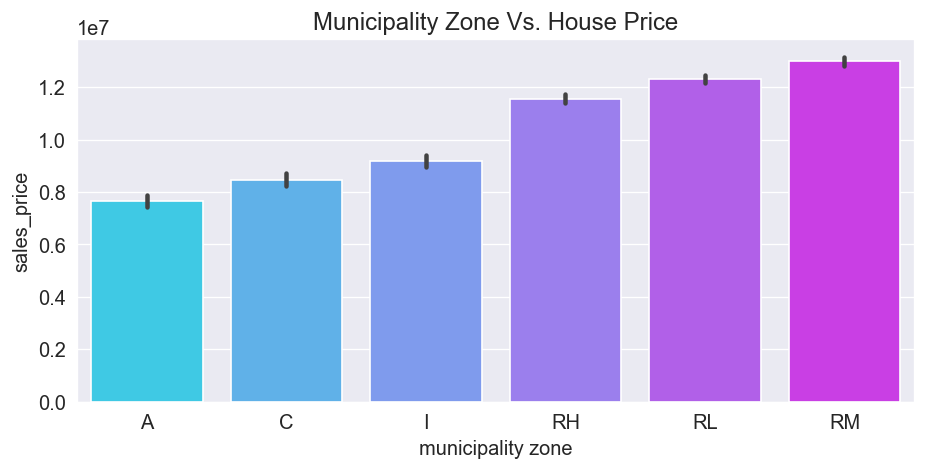

In [128]:
plt.figure(figsize=(9,4))
sns.barplot(x='mzzone', y='sales_price', data=data, order=order.reset_index().mzzone, palette='cool')
plt.title("Municipality Zone Vs. House Price")
plt.xlabel('municipality zone')
plt.show()

- House price increases with the municipality zone.

- RM zone has most expensive houses, whereas A zone has cheapest houses.

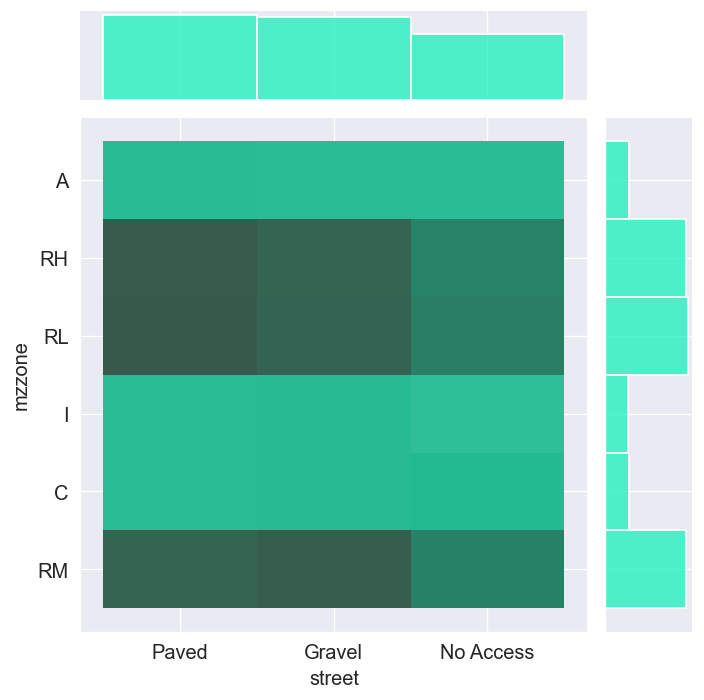

In [129]:
sns.jointplot(data=data, x='street',y='mzzone', kind='hist', color='#18F1BB');

<a id='age-of-house'></a>

### Age of House 

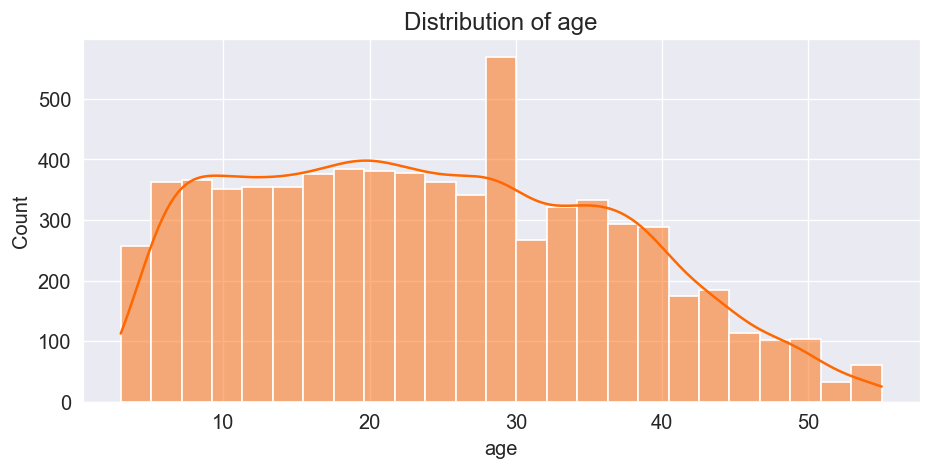

In [130]:

sns.histplot(data=data, x='age', kde=True, color='#ff6700')
plt.title("Distribution of age")
plt.show()

- Distribution in house age is skewed.

- Theres are less aged houses, i.e. less number of houses age more than 35

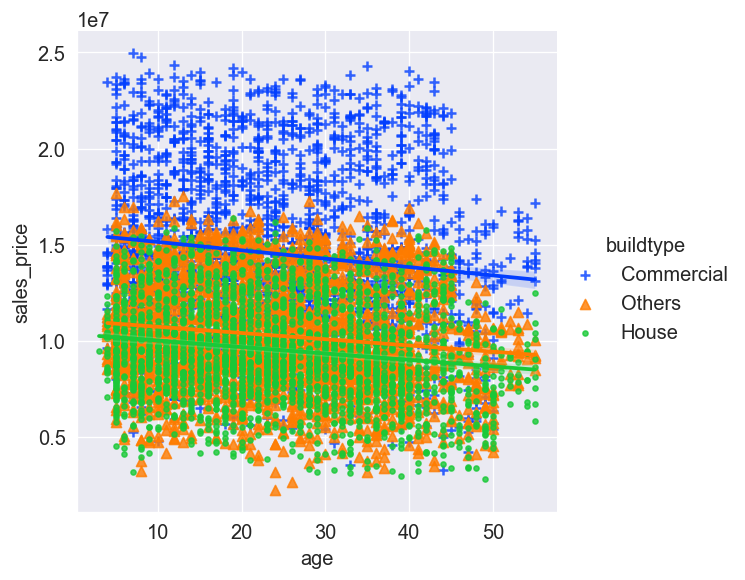

In [131]:
ax = sns.lmplot(data=data, x='age', y='sales_price', hue='buildtype', markers=['+', '^', '.']) #color="#c04000")

- With increase in house age price decreases.

- The trend is linear.

<a id='qs-rooms'></a>

### QS Rooms

In [132]:
data.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  sale_year  built_year  \
0          3.9         4.9       4.330      8124400       2011        1967   
1          4.2         2.5       3.765     22781941       2006        1995   
2          3.8         2.2       3.090     13672408       2012        1992   
3          3.9         3.6       4.010     10063653       2010        1988   
4          2.5         4.1       3.290      7717313       2009        1979   

   age  
0   44  
1   11  
2   20  
3   22  
4   30

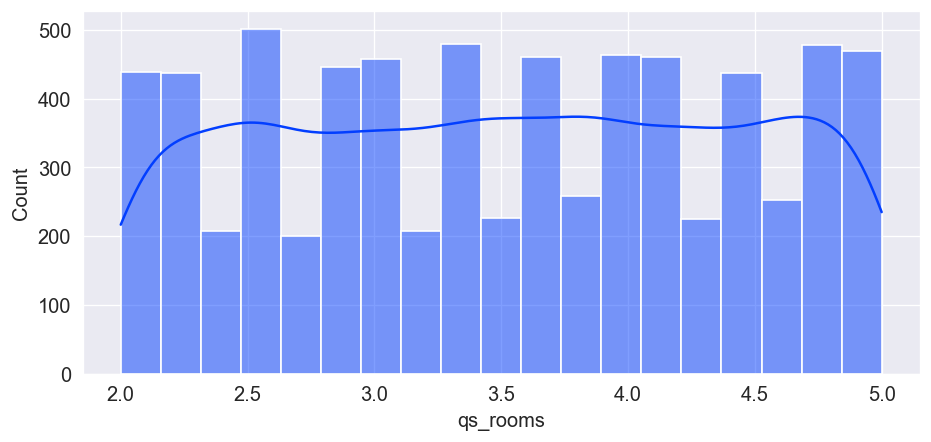

In [133]:
sns.histplot(data=data, x='qs_rooms', kde=True);

- Distribution in QS rooms is uniform.

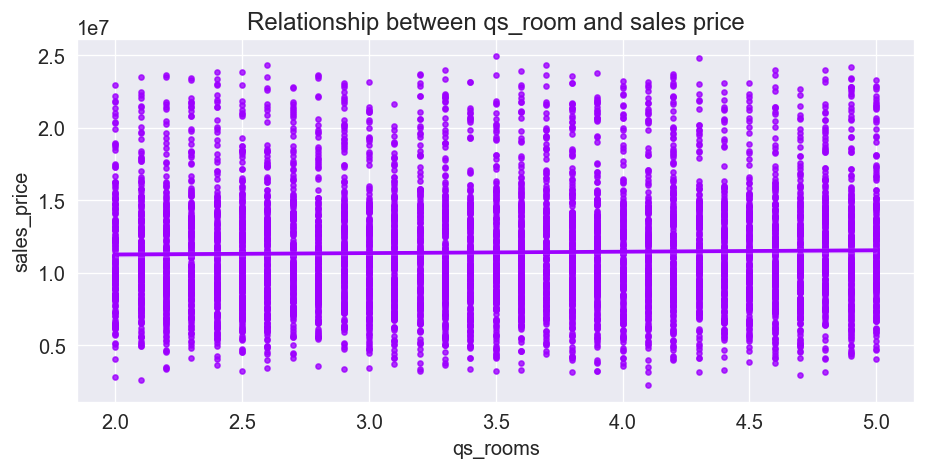

In [134]:
plt.figure(figsize=(9,4))
sns.regplot(data=data, x='qs_rooms', y='sales_price', color='#9d00ff', marker='.')
plt.title("Relationship between qs_room and sales price")
plt.show()

- QS room follows uniform discrete distribution with sales price.

<a id='qs-overall'></a>

### QS Overall

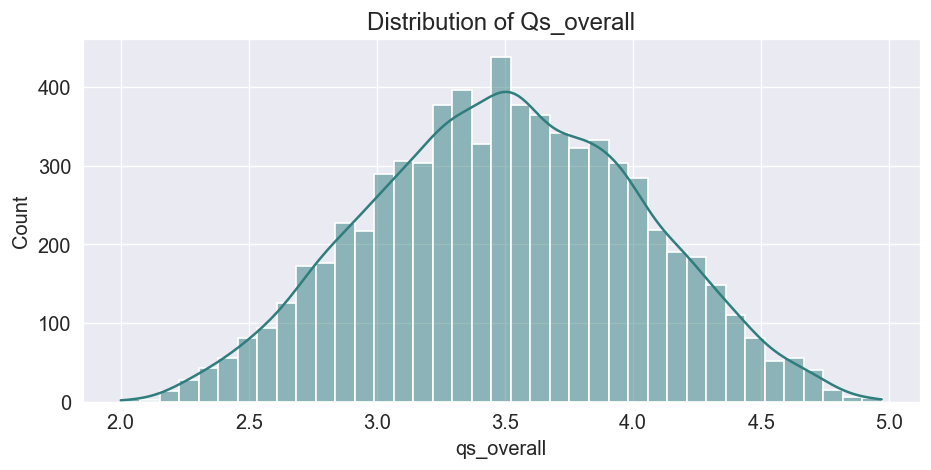

In [135]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x='qs_overall', color='#307d7e', kde=True)
plt.title("Distribution of Qs_overall")
plt.show()

- QS overall follows a linear distribution

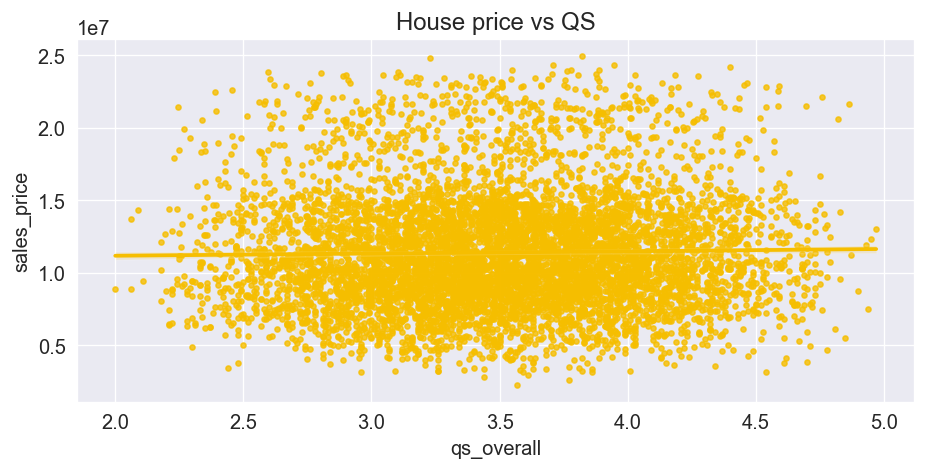

In [136]:
plt.figure(figsize=(9,4))
sns.regplot(data=data, x='qs_overall', y='sales_price', marker='.', color='#f6be00')
plt.title("House price vs QS")
plt.show()

- QS Overall also follows an uniform distribution with sales price.

<a id='data-preprocessing'></a>

## Data Pre-Processing
----

In [137]:
df = data.copy()

df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  sale_year  built_year  \
0          3.9         4.9       4.330      8124400       2011        1967   
1          4.2         2.5       3.765     22781941       2006        1995   
2          3.8         2.2       3.090     13672408       2012        1992   
3          3.9         3.6       4.010     10063653       2010        1988   
4          2.5         4.1       3.290      7717313       2009        1979   

   age  
0   44  
1   11  
2   20  
3   22  
4   30

In [138]:
def mapper_func(col):
    mapper = {}
    for i in col:
        print(i)
        val = int(input())
        mapper[i] = val
    
    return mapper

In [139]:
locality_mapper = mapper_func(col=df.locality.unique().tolist())

Karapakkam
Anna Nagar
Adyar
Velachery
Chrompet
KK Nagar
T Nagar


In [140]:
print(locality_mapper)

{'Karapakkam': 1, 'Anna Nagar': 6, 'Adyar': 2, 'Velachery': 4, 'Chrompet': 3, 'KK Nagar': 5, 'T Nagar': 7}


In [141]:
sale_condition_mapper = mapper_func(df.sale_cond.unique().tolist())

print(sale_condition_mapper)

AbNormal
Family
Partial
AdjLand
Normal Sale
{'AbNormal': 3, 'Family': 2, 'Partial': 1, 'AdjLand': 5, 'Normal Sale': 4}


In [142]:
utility_mapper = mapper_func(df.utility_avail.unique().tolist())

print(utility_mapper)

AllPub
ELO
NoSewr 
NoSeWa
{'AllPub': 4, 'ELO': 1, 'NoSewr ': 3, 'NoSeWa': 2}


In [ ]:
df.mzzone.unique().tolist()

['A', 'RH', 'RL', 'I', 'C', 'RM']

In [143]:
mzone_mapper = mapper_func(df.mzzone.unique().tolist())

print(mzone_mapper)

A
RH
RL
I
C
RM
{'A': 1, 'RH': 4, 'RL': 5, 'I': 3, 'C': 2, 'RM': 6}


In [144]:
street_mapper = mapper_func(df.street.unique().tolist())
print(street_mapper)

Paved
Gravel
No Access
{'Paved': 2, 'Gravel': 3, 'No Access': 1}


<a id='label-encoding'></a>

### Label Encoding

- All categorical attributes except buildtype will be encoded with label encoder.

- Mapping functions has been generated to map the categories based on their order from analysis.

In [145]:
df['locality'] = df.locality.map(locality_mapper)           # map locality
df['sale_cond'] = df.sale_cond.map(sale_condition_mapper)   # map sale condition
df['park_facil'] = df.park_facil.map({'Yes':1,"No":0})      # parking facility
# df['buildtype'] = df.buildtype.map(build_type_mapper)       # build type
df['utility_avail'] = df.utility_avail.map(utility_mapper)  # utility
df['street'] = df.street.map(street_mapper)                 # street
df['mzzone'] = df.mzzone.map(mzone_mapper)                  # municipality zone

In [146]:
df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   sale_cond  park_facil   buildtype  utility_avail  street  mzzone  qs_rooms  \
0          3           1  Commercial              4       2       1       4.0   
1          3           0  Commercial              4       3       4       4.9   
2          3           1  Commercial              1       3       5       4.1   
3          2           0      Others              3       2       3       4.7   
4          3           1      Others              4       3       2       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  sale_year  built_year  \
0          3.9         4.9       4.330      8124400       2011        1967   
1          4.2         2.5       3.765     22781941       2006        1995   
2          3.8         2.2       3.090     13672408       2012        1992   
3          3.9         3.6       4.010     10063653       2010        1988   
4          2.5         4.1       3.290      7717313       2009        1979   

   age  
0   44  
1   11  
2   20  
3   22  
4   30

<a id='one-hot-encoding'></a>

### One-Hot Encoding

- Build type column will be encoded with one-hot encoding method, as it doesn't follow a linear trend with sales price.


In [147]:
# Encoding build type

df = pd.get_dummies(df)

In [148]:
df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   sale_cond  park_facil  utility_avail  street  mzzone  qs_rooms  \
0          3           1              4       2       1       4.0   
1          3           0              4       3       4       4.9   
2          3           1              1       3       5       4.1   
3          2           0              3       2       3       4.7   
4          3           1              4       3       2       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  sale_year  built_year  \
0          3.9         4.9       4.330      8124400       2011        1967   
1          4.2         2.5       3.765     22781941       2006        1995   
2          3.8         2.2       3.090     13672408       2012        1992   
3          3.9         3.6       4.010     10063653       2010        1988   
4          2.5         4.1       3.290      7717313       2009        1979   

   age  buildtype_Commercial  buildtype_House  buildtype_Others  
0   44                     1                0                 0  
1   11                     1                0                 0  
2   20                     1                0                 0  
3   22                     0                0                 1  
4   30                     0                0                 1

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality              7109 non-null   int64  
 1   house_size            7109 non-null   int64  
 2   dist_mainroad         7109 non-null   int64  
 3   n_bedroom             7109 non-null   int64  
 4   n_bathroom            7109 non-null   int64  
 5   n_room                7109 non-null   int64  
 6   sale_cond             7109 non-null   int64  
 7   park_facil            7109 non-null   int64  
 8   utility_avail         7109 non-null   int64  
 9   street                7109 non-null   int64  
 10  mzzone                7109 non-null   int64  
 11  qs_rooms              7109 non-null   float64
 12  qs_bathroom           7109 non-null   float64
 13  qs_bedroom            7109 non-null   float64
 14  qs_overall            7109 non-null   float64
 15  sales_price          

<a id='drop-unnecessary-col'></a>

### Drop unnecessary columns

- Columns like QS Rooms, QS bathrooms, QS overall, distance form main road, sale year are not relatable to sales price.

- Drop these columns

In [152]:
# drop columns with no relation to house price
# dist_mainroad, qs_rooms, qs_bedroom, qs_overall

df.drop(['dist_mainroad', 'qs_rooms', 'qs_bathroom','qs_overall', 'qs_bedroom', 'sale_year'], axis=1, inplace=True)

In [153]:
df.to_csv('chennai-housing-label-encoded.csv', index=False)
print('Clean data has been saved')

In [3]:
# import the clean data
df = pd.read_csv('chennai-housing-label-encoded.csv')
df.head()

locality  house_size  n_bedroom  n_bathroom  n_room  sale_cond  park_facil  \
0         1        1004          1           1       3          3           1   
1         6        1986          2           1       5          3           0   
2         2         909          1           1       3          3           1   
3         4        1855          3           2       5          2           0   
4         1        1226          1           1       3          3           1   

   utility_avail  street  mzzone  sales_price  built_year  age  \
0              4       2       1      8124400        1967   44   
1              4       3       4     22781941        1995   11   
2              1       3       5     13672408        1992   20   
3              3       2       3     10063653        1988   22   
4              4       3       2      7717313        1979   30   

   buildtype_Commercial  buildtype_House  buildtype_Others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1

<a id='transform-non-linear'></a>

### Transformation of abnormally distributed data

- Non linearly distributed data like the `house size` that doesn't follow a normal distribution need to be transformed.

- This is because to enhance the learning method for parametric machine learning model like linear regressor in this case.

- Linear regression model needs the data to be scaled and transformed.

- In this case we are following log transformation.


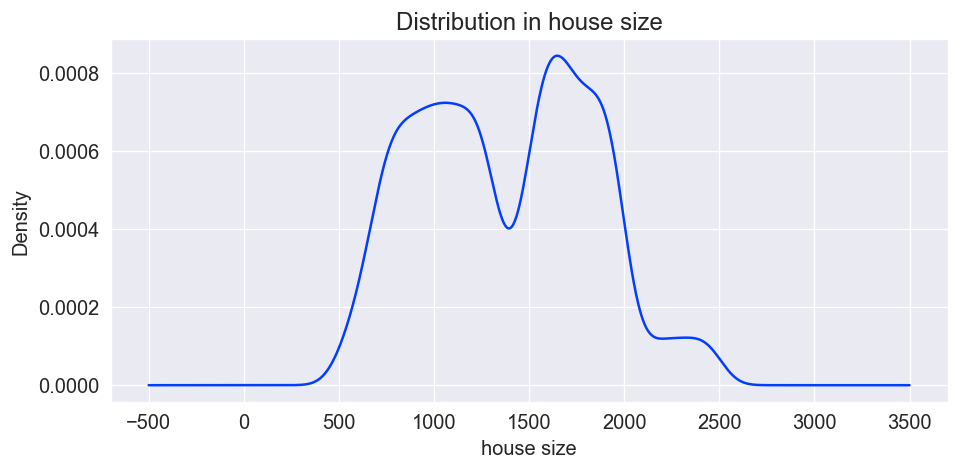

In [155]:
df.house_size.plot.kde()
plt.title("Distribution in house size")
plt.xlabel('house size')
plt.show()

- Non-normal distribution.

In [4]:
# Transformation
df['house_size'] = np.log(df.house_size)

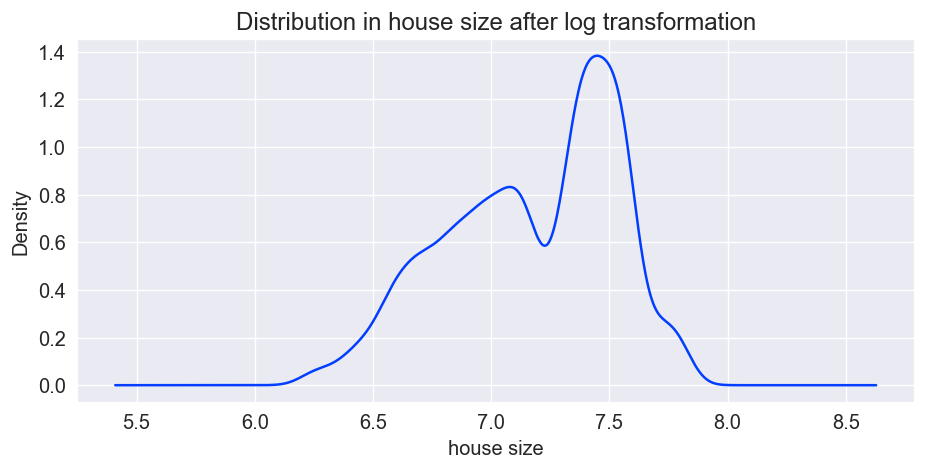

In [157]:
df.house_size.plot(kind='kde')
plt.title("Distribution in house size after log transformation")
plt.xlabel('house size')
plt.show()

- Now the data looks like somewhat normalized.

<a id='split'></a>

### Train test split

- Differentiate the target from feature.

- Then, use `sklearn.model_selection's train_test_split` to split the data into training and testing set.

In [5]:
X = df.drop(['sales_price'], axis=1)
y = df.sales_price

X.shape, y.shape

((7109, 15), (7109,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=47, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 15), (5687,), (1422, 15), (1422,))

<a id='feature-scaling'></a>

### Feature Scaling 

- It is necessary to scale the features for parametric models.

- Non parametric models like Random Forest and Decision Tree can handle unscaled data without any learning issue.

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='m-learning'></a>

## Machine Learning

-----

**Problem type**: `Supervised Regression` 

- For better prediction of sales price of new houses, we will try different models like linear regression, ElasticNet Regression, KNN regression, Decision Tree Regression, and Random Forest Regression.

- We will build the model, then predict and compare the results, scores, if the score does not look good, or there are chances of overfitting or underfitting, we will perform cross validation for non-parametric models and regularization for parametric models.


<a id='linear-regression'></a>

### Linear Regression Model

- This is a multi-class linear regression problem

In [8]:
lr = LinearRegression().fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

In [9]:
# score
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))


print("")
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))



Training score: 0.92
Test score: 0.92

R2 score: 0.92
MSE: 1192106262214.23
MAE: 823873.75


- Training and testing score for linear model looks good. 

- The model is not suffering from overfitiing or underfitting.

#### prediction


In [10]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(10)

actual     predicted
3410   9305778  9.572121e+06
5610  11420800  1.091254e+07
72     9466999  9.948953e+06
4268  13685704  1.477507e+07
2399  21694013  1.909635e+07
661   12937737  1.331382e+07
3798   8652769  7.811865e+06
708    6550648  5.464857e+06
3464  21137174  1.933801e+07
2126  11998838  1.312131e+07

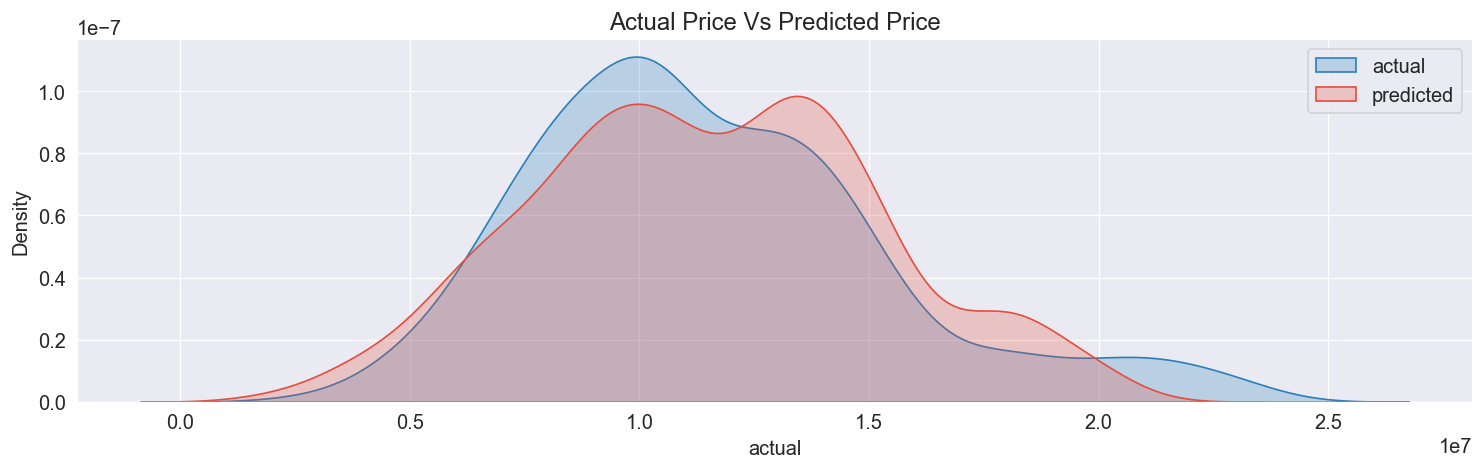

In [11]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

- Model has 92% r2 score, the train and test score are also same. 

- However, most of predictions are high at some point and low at some point in comparison to true price..

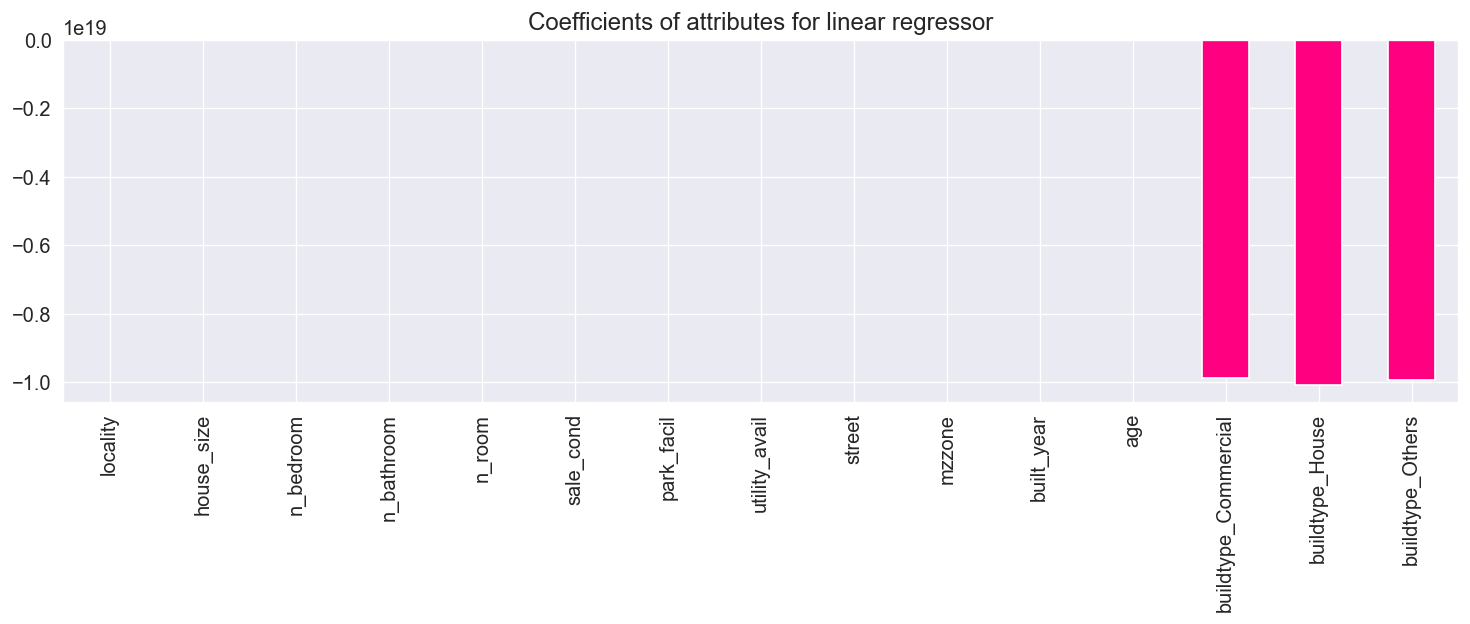

In [12]:
# coefficients
lr_coefficient = pd.Series(lr.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
lr_coefficient.plot(kind='bar', color=['#ff0080'])
plt.title("Coefficients of attributes for linear regressor")
plt.show()

- Features like distance form main road, number of bedrooms, utility available, qs room, qs bedroom, qs overall and age has less coefficient.

- Build type, number of bedroom, number of room, locality, and municipality zone are having higher coefficient.

<a id='elastic-net'></a>

### ElasticNet Regression

In [13]:
elnet= ElasticNet(alpha=0.001, l1_ratio=0.62)

elnet.fit(X_train, y_train)
elasticnet_predict = elnet.predict(X_test)

In [14]:
# score
print("ElasticNet Training score: {:.2f}".format(elnet.score(X_train, y_train)))
print("ElasticNet Test score: {:.2f}".format(elnet.score(X_test, y_test)))


print("")
print("ElasticNet R2 score: {:.2f}".format(metrics.r2_score(y_test, elasticnet_predict)))
print("ElasticNet MSE: {:.2f}".format(metrics.mean_squared_error(y_test, elasticnet_predict)))
print("ElasticNet MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, elasticnet_predict)))

ElasticNet Training score: 0.92
ElasticNet Test score: 0.92

ElasticNet R2 score: 0.92
ElasticNet MSE: 1192052519869.90
ElasticNet MAE: 823446.97


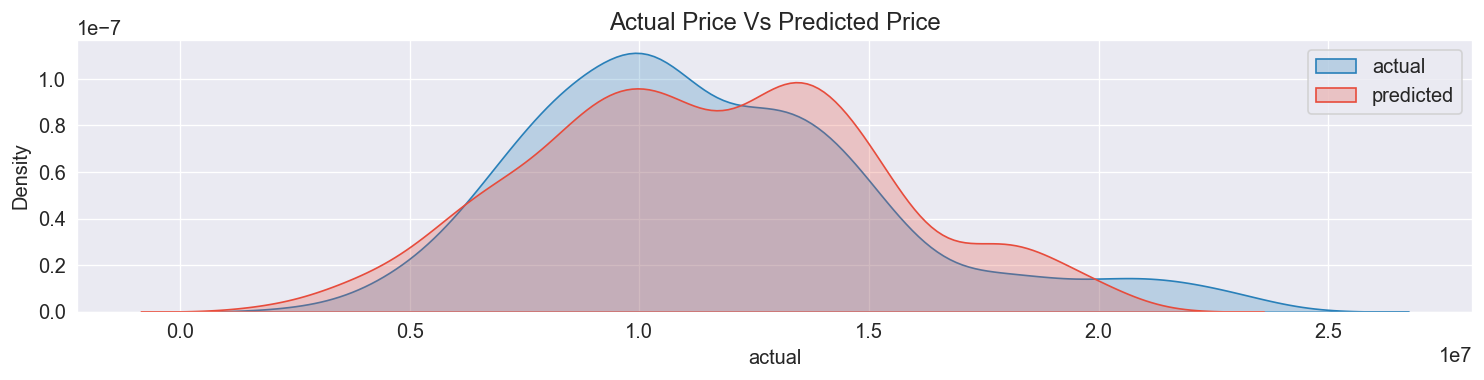

In [15]:
elnet_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':elasticnet_predict.flatten()
})


plt.figure(figsize=(15,3))
sns.kdeplot(data=elnet_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=elnet_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

- Both the elastic net and linear regression predictions are identical.

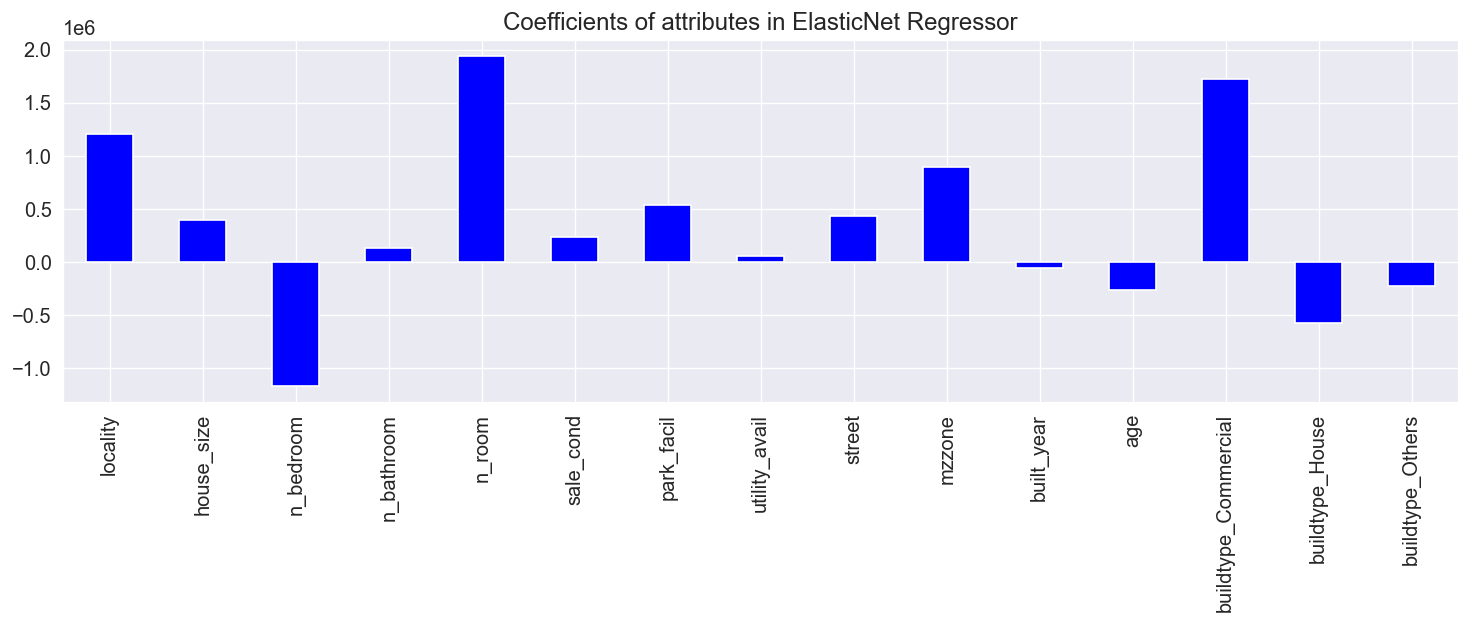

In [16]:
# coefficients
elnet_coefficient = pd.Series(elnet.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
elnet_coefficient.plot(kind='bar', color=['b'])
plt.title("Coefficients of attributes in ElasticNet Regressor")
plt.show()

- The coefficients of elastic net regressor model are not same as linear regressor.

<a id='knn-regressor'></a>

### KNN Regressor

In [17]:
knn_regressor = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)


print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))

KNN regressor train score: 0.97
KNN regressor test score: 0.95


In [18]:
# Cross validation of knn

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)

knn_search.fit(X,y)

print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)

Best parameter: {'n_neighbors': 5}
Best score:  0.6969797229942515


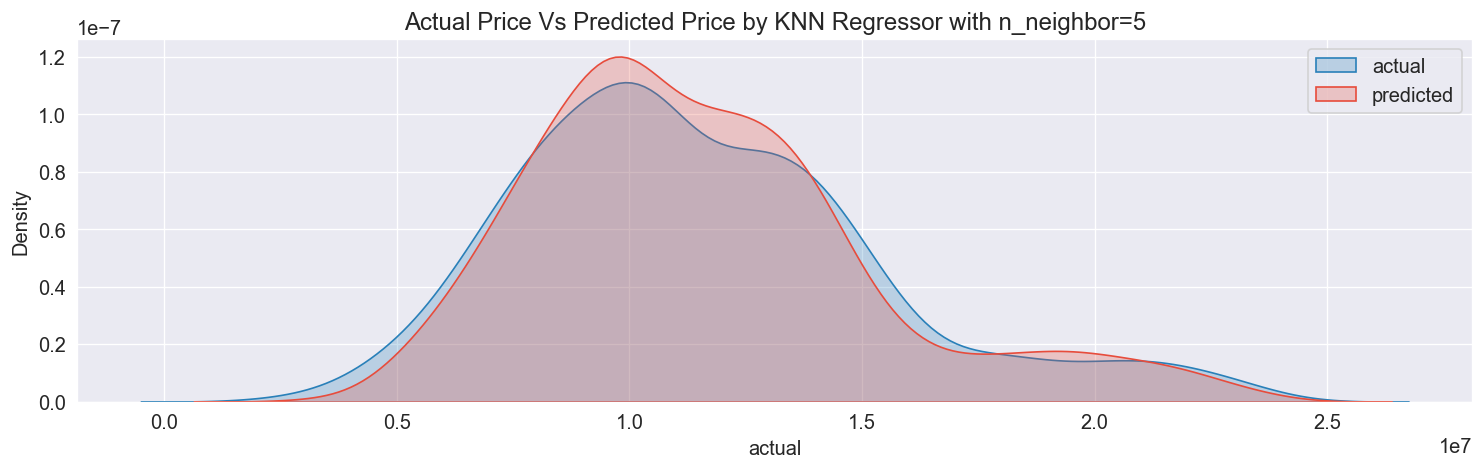

In [19]:
knn_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': knn_ypred.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=knn_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by KNN Regressor with n_neighbor=5")
plt.legend()
plt.show()

- Predictions are high at higher volume of house selling.

<a id='dt-regressor'></a>

### Decision Tree Regression:



In [20]:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)

In [21]:
# score
print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))


print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.97
DT Test score: 0.96

DT R2 score: 0.96
DT MSE: 663872973751.08
DT MAE: 643452.74


- The R^2 score looks good.
- The train test scores are near to each other.

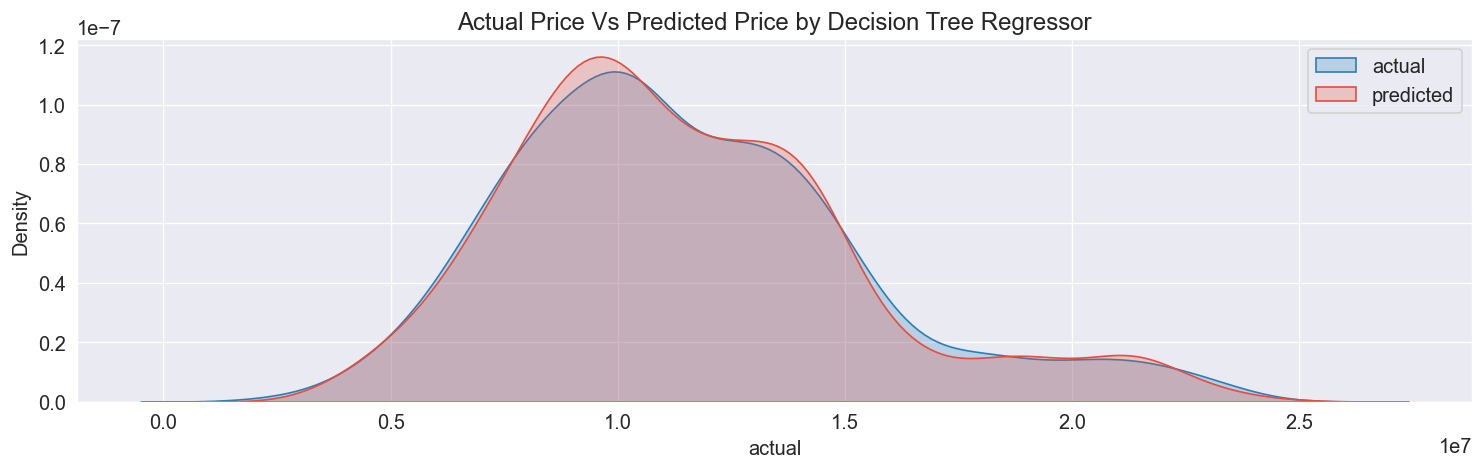

In [22]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': dt_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plt.legend()
plt.show()

- The predictions of DT looks nearly accurate and the model has better score

In [23]:
# coefficients
dt_coefficient = pd.Series(dt_regressor.feature_importances_, index=X.columns.tolist())


In [24]:
dt_coefficient.sort_values(ascending=False)

locality                0.495909
buildtype_Commercial    0.331378
house_size              0.098982
mzzone                  0.035975
park_facil              0.014238
n_bathroom              0.011062
street                  0.007357
buildtype_Others        0.002390
buildtype_House         0.001183
age                     0.000875
built_year              0.000355
sale_cond               0.000149
utility_avail           0.000139
n_room                  0.000006
n_bedroom               0.000000
dtype: float64

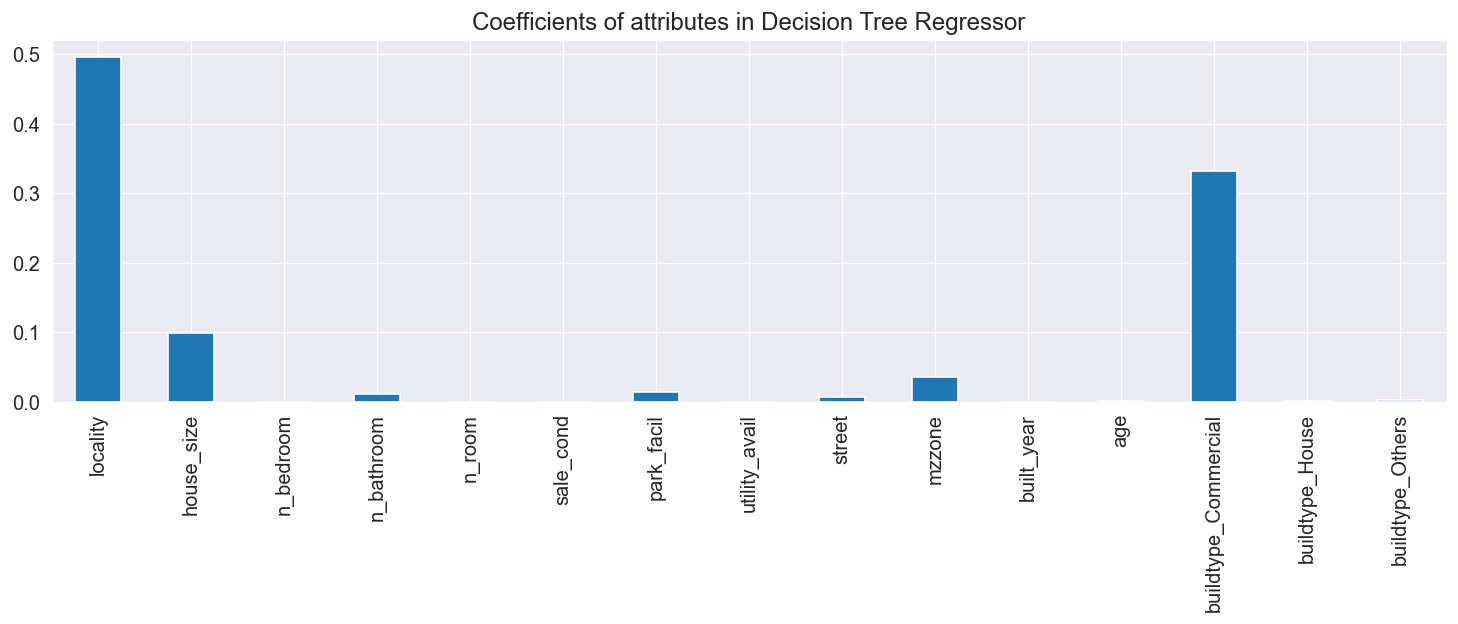

In [25]:
# coefficients

plt.figure(figsize=(15, 4))
dt_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in Decision Tree Regressor")
plt.show()

- In the decision tree regressor model, locality, building type has more feature importance, followed by house size and municipality zone.

- Parking facility, street type and number of bedrooms have little importance.

<a id='rf-regressor'></a>

### Random Forest Regressor

In [196]:
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)

rf_y_predict = rf_regressor.predict(X_test)


# score
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 1.00
RF Test score: 0.99

RF R2 score: 0.99
RF MSE: 183464375007.33
RF MAE: 336206.26


- $R^2$ of Random Forest Regressor is more than Decision Tree Regressor.

- Mean Squared Error of RF regressor is more than DT regressors.

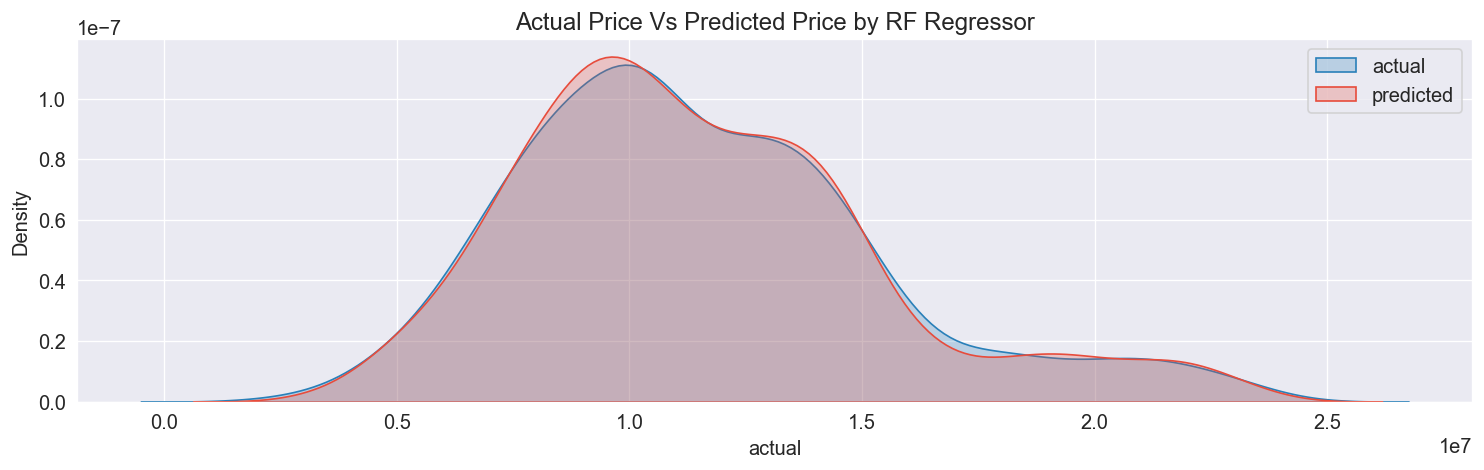

In [197]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': rf_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

- Wow!!! The model is predicting some values higher, however overall prediction looks near to actual values.

### Cross Validation of RF Regressor

In [190]:
rf_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,10),
        'n_estimators': (10,50, 100, 1000),
        'random_state': [0,20,30]
    },
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=0,
    n_jobs=-1
)

grid_result = rf_search.fit(X,y)

In [194]:
print("Best estimator for RF: {}".format(grid_result.best_estimator_))

Best estimator for RF: RandomForestRegressor(max_depth=9, n_estimators=1000, random_state=0)


In [198]:
# initiating the model with best estimators
rf_regressor = RandomForestRegressor(max_depth=9, n_estimators=1000, random_state=0)
# fit the model with training data
rf_regressor.fit(X_train, y_train)
# predict on X_test
rf_y_predict = rf_regressor.predict(X_test)

# score
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 0.99
RF Test score: 0.98

RF R2 score: 0.98
RF MSE: 307047735321.31
RF MAE: 441502.27


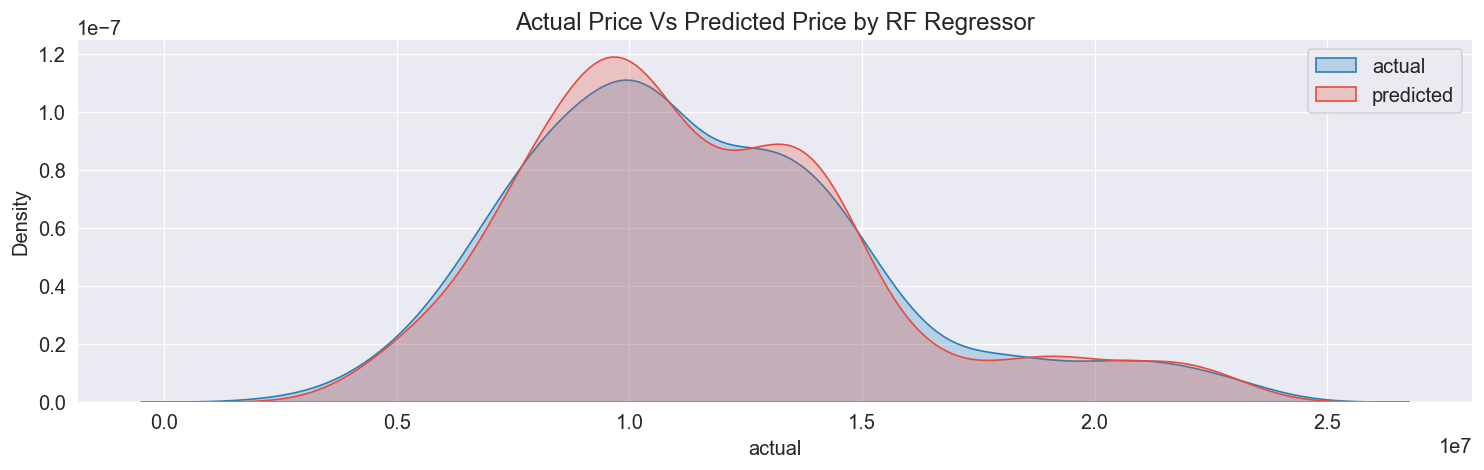

In [199]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': rf_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by RF Regressor")
plt.legend()
plt.show()

In [204]:
# coefficients of random forest
rf_coefficient = pd.Series(rf_regressor.feature_importances_, index=X.columns.tolist())

rf_coefficient.sort_values(ascending=False)

locality                0.487327
buildtype_Commercial    0.327400
house_size              0.103377
mzzone                  0.037097
park_facil              0.013994
street                  0.009739
n_room                  0.008691
buildtype_Others        0.002102
buildtype_House         0.002066
n_bathroom              0.001787
n_bedroom               0.001768
age                     0.001513
built_year              0.001466
sale_cond               0.001152
utility_avail           0.000521
dtype: float64

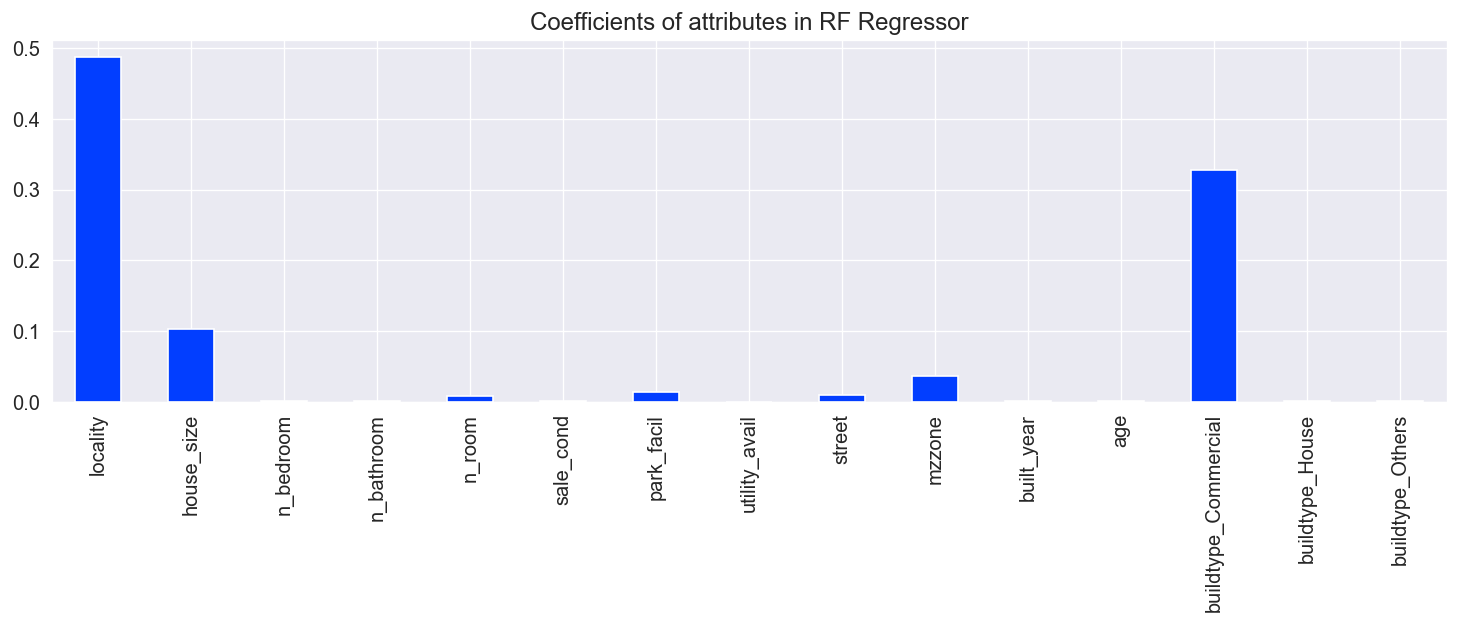

In [205]:
# coefficients

plt.figure(figsize=(15, 4))
rf_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in RF Regressor")
plt.show()

- Coefficients of Decision tree and Random forest regressor are nearly same.

<a id='conclusion'></a>

## Conclusion:




[Navigate to Top](#contents)